# Predicting Stroke Risk <a id='top'></a>
## Phase 1: Data Preparation & Visualisation

### Group Name: 10

#### Name(s) & ID(s) of Group Members:

- Nopphasorn Chuaydumrongsakul (S3868578)
- Matikorn Inprom (S3930892)
- Sukhum Boondecharak (S3940976)

## Table of Contents <a id='back'></a>
* [Introduction](#intro) 
  + [Dataset Source](#ds)
  + [Dataset Details](#dd)
  + [Dataset Features](#df)
  + [Target Feature](#tf)
* [Goals and Objectives](#go)
* [Data Cleansing and Preprocessing](#dcp)
  + [Normalisation of Names and Values](#nnv)
  + [Data Interpretation and Manipulation](#dim)
  + [Missing Data Imputation](#mdi)
* [Data Exploration and Visualisation](#dev)
  + [Univariate Visualisation](#1v)
  + [Two-Variable Visualisation](#2v)
  + [Three-Variable Visualisation](#3v)
* [Literature Review](#lr)
* [Summary and Conclusions](#sum)
* [References](#ref)
* [Literature Review References](#lrref)



## Introduction <a id='intro'></a>

### Dataset Source <a id='ds'></a>

This dataset was sourced from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) (FEDESORIANO, 2021). This dataset can be analysed to provide comprehensive information that can be used to predict stroke risk based on the given factors.

### Dataset Details <a id='dd'></a>

A stroke, also known as a "brain attack," happens when there is a reduction or interruption in the blood supply to a portion of the brain. This eliminates the brain tissue of oxygen and nutrients, which can result in life-threatening complications or even death. [(Stroke (Brain Attack), n.d.)](#ref01)<a id='cite01'></a> The dataset's primary goal is to provide information regarding the variables that influence a person's risk of having a stroke by focusing on stroke prediction.

The dataset gathers different personal attributes and characteristics in order to better understand and predict stroke occurrences. These characteristics include age, gender, and marital status in addition to health-related details like the presence of heart disease or hypertension (high blood pressure). A person's lifestyle is also taken into consideration, including their type of occupation, type of housing (rural or urban), and smoking habits.

The dataset also contains physiological measurements, such as the person's body mass index (BMI), which is a measurement of body fat based on height and weight, and the average blood glucose level. When taken as a whole, these characteristics provide a complete picture of each person's lifestyle and health.

This dataset has a total of 12 features (including id) and 5,110 observations.

**Dataset Retrieval**

- We download the dataset, read in the dataset from our local directory, and load the modules we will use throughout this report.
- We display 10 randomly sampled rows from this dataset.

In [1]:
# import necessary libraries and modules

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
# read dataset from our local directory

stroke_df = pd.read_csv('Phase1_Group10.csv')

In [3]:
# check the number of observations and features

stroke_df.shape

(5110, 12)

In [4]:
# print 10 random observations

stroke_df.sample(10, random_state=99)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1665,35432,Female,36.0,0,0,Yes,Private,Rural,95.36,25.1,never smoked,0
2859,51746,Female,37.0,0,0,Yes,Govt_job,Rural,67.07,27.4,never smoked,0
4192,33886,Female,30.0,0,0,No,Private,Rural,87.12,31.1,smokes,0
898,62716,Female,59.0,0,0,Yes,Self-employed,Urban,81.64,32.8,Unknown,0
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
104,33175,Female,57.0,0,0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
1090,61769,Male,30.0,0,0,No,Private,Urban,88.65,22.2,never smoked,0
4975,42297,Female,36.0,0,0,Yes,Private,Urban,124.31,26.4,Unknown,0
3229,52080,Female,26.0,0,0,No,Private,Rural,85.27,24.6,never smoked,0
4779,65892,Female,58.0,0,0,Yes,Self-employed,Urban,66.71,51.7,never smoked,0


### Dataset Features <a id='df'></a>

In [5]:
# Create a table to explain features that will be used in this project 

from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal categorical','NA','Indicates whether the individual is male or female.'],
         ['Age','Numeric','Years','Represents the age of the individual.'],
         ['Hypertension','Binary','NA','Indicates whether the individual has high blood pressure or not.'],
         ['Heart Disease','Binary','NA','Indicates whether the individual has heart disease or not.'],
         ['Marital Status','Binary','NA','Indicates whether the individual has been married or not.'],
         ['Work Type','Nominal categorical','NA','Describes the type of work the individual is engaged in, which may reflect lifestyle factors.'],
         ['Residence Type','Binary','NA','Indicates whether the individual resides in an urban or rural area.'],
         ['Average Glucose Level','Numeric','mg/dL','Represents the average blood sugar level in the individual\'s blood.'],
         ['BMI','Numeric','kg/m^2','A measure of body fat based on height and weight.'],
         ['Smoking Status','Nominal categorical','NA','Indicates the individual\'s smoking habits.'],
         ['Stroke','Binary','NA','A binary indicator for stroke occurrence, specifying whether the individual has had a stroke or not.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', maxcolwidths=[20, 20, None,60]))

╒═════════════════╤═════════════════════╤═════════╤══════════════════════════════════════════════════════════════╕
│ Name            │ Data Type           │ Units   │ Description                                                  │
╞═════════════════╪═════════════════════╪═════════╪══════════════════════════════════════════════════════════════╡
│ Gender          │ Nominal categorical │ NA      │ Indicates whether the individual is male or female.          │
├─────────────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────┤
│ Age             │ Numeric             │ Years   │ Represents the age of the individual.                        │
├─────────────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────┤
│ Hypertension    │ Binary              │ NA      │ Indicates whether the individual has high blood pressure or  │
│                 │                     │         │ not.                        

### Target Features <a id='tf'></a>

For this project, the target feature in this dataset will be `stroke`, which is a categorical feature. (1 as yes or 2 as no) That is, the risk of having a stroke will be predicted based on the explanatory/ descriptive variables.

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Goals and Objectives <a id='go'></a>

Stroke is a major global health issue that frequently has serious consequences, including disability or even death. [(Eric S. Donkor, 2018)](#ref02)<a id='cite02'></a> The World Health Organisation (WHO) reports that stroke ranks as the second most common cause of death worldwide, accounting for about 11% of all fatalities. [(FEDESORIANO, 2021)](#ref03)<a id='cite03'></a> Given the growing rate of stroke, it is critical for modern healthcare practitioners to comprehend and effectively manage this risk. [(Shyam Bishen, 2023)](#ref04)<a id='cite04'></a> By looking deeper into the underlying causes and trends of stroke, data analysis enables us to create proactive preventative and intervention plans. We may find insights that allow for the early identification of people who are at risk, enabling prompt interventions and, ultimately, saving lives by utilising the power of data science.

Analysing the "Stroke Prediction Dataset" offers a chance to create a tool that predicts stroke risk based on health data. The main goal is to make a model that accurately sorts people into two groups: those at risk of stroke and those not at risk. This involves steps like exploring the data to understand it, picking the most important factors, building models, and checking how well they work.

For `Phase 1`, we will initially clean and look closely at the data to see what it tells us about people's health and how it relates to stroke risk. Next, we have to decide to choose which factors seem most important for predicting stroke risk and adjust them as needed. Then, in `Phase 2`, we will build actual models that predict stroke risk and try different methods to see which one works best. After the model is chosen, we will test the model to make sure it's doing its job well. If it's accurate, it can be a valuable tool for healthcare professionals. It could help them identify people at risk of stroke early on, allowing for timely interventions to prevent strokes or reduce their impact.

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Data Cleansing and Preprocessing <a id='dcp'></a>

### Data Cleaning Steps

1.   Normalisation of Names and Values
2.   Data Interpretation and Manipulation
3.   Missing Data Imputation

### Normalisation of Names and Values <a id='nnv'></a>

Initially, we will standardise the naming of all features to lowercase and eliminate any unnecessary white spaces by applying the `strip()` function. Additionally, we will inspect all the features in the dataset using the `column` function to ensure data integrity and consistency.

In [6]:
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
stroke_df.columns = stroke_df.columns.str.lower().str.strip()
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

`id` column does not contribute to predicting stroke risk and therefore will be dropped before further analysis is conducted.

In [8]:
stroke_df = stroke_df.drop(columns='id')
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Furthermore, we update the column name from `ever_married` to `marital_status` to align it with the corresponding feature described in the previous table.

In [9]:
stroke_df = stroke_df.rename(columns={'ever_married': 'marital_status'})
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'marital_status',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Now, we check the type of each feature in our data frame.

In [10]:
print(f"Shape of the dataset = {stroke_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(stroke_df.dtypes)

Shape of the dataset = (5110, 11) 

Data types are below where 'object' indicates a string type: 
gender                object
age                  float64
hypertension           int64
heart_disease          int64
marital_status        object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


We then organise values in the data frame to be all lower-cased. This will make it easier to detect typographical errors or inconsistencies in our data.

In [11]:
stroke_df = stroke_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
stroke_df.sample(10, random_state=99)

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1665,female,36.0,0,0,yes,private,rural,95.36,25.1,never smoked,0
2859,female,37.0,0,0,yes,govt_job,rural,67.07,27.4,never smoked,0
4192,female,30.0,0,0,no,private,rural,87.12,31.1,smokes,0
898,female,59.0,0,0,yes,self-employed,urban,81.64,32.8,unknown,0
3116,other,26.0,0,0,no,private,rural,143.33,22.4,formerly smoked,0
104,female,57.0,0,0,yes,govt_job,urban,110.52,28.5,unknown,1
1090,male,30.0,0,0,no,private,urban,88.65,22.2,never smoked,0
4975,female,36.0,0,0,yes,private,urban,124.31,26.4,unknown,0
3229,female,26.0,0,0,no,private,rural,85.27,24.6,never smoked,0
4779,female,58.0,0,0,yes,self-employed,urban,66.71,51.7,never smoked,0


<span style="float:right;">[Back to Table of Contents](#back)</span>

### Data Interpretation and Manipulation <a id='dim'></a>

As part of this step, we conduct a summary analysis of the categorical feature to assess the distribution of its values and verify the presence of any typographical errors or inconsistencies that could potentially affect the integrity of the data

In [12]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of Categorical Features</b>'))
stroke_df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,female,2994
marital_status,5110,2,yes,3353
work_type,5110,5,private,2925
residence_type,5110,2,urban,2596
smoking_status,5110,4,never smoked,1892


In [13]:
# To see all unique values for categorical data types

categoricalColumns = stroke_df.columns[stroke_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col + '\n')
    print(stroke_df[col].value_counts())
    print('')

Unique values for gender

female    2994
male      2115
other        1
Name: gender, dtype: int64

Unique values for marital_status

yes    3353
no     1757
Name: marital_status, dtype: int64

Unique values for work_type

private          2925
self-employed     819
children          687
govt_job          657
never_worked       22
Name: work_type, dtype: int64

Unique values for residence_type

urban    2596
rural    2514
Name: residence_type, dtype: int64

Unique values for smoking_status

never smoked       1892
unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



The numbers for each value seems to be normal; however, we have spotted something that should be manipulated:

- While it's important to respect individual gender preferences, the `other` category in the `gender` column comprises only one value out of a total of 5,110 entries. However, considering that the overwhelming majority of gender selections are either `male` or `female`, the `other` category appears to have minimal representation and may not significantly impact the analysis. Therefore, we will eliminate this observation.


- We also propose to replace the `children` category in the `work_type` column with the `never_worked` category, under the assumption that the `work_type` column represents work status. This consolidation simplifies the analysis by reducing the number of distinct categories in the dataset, enhancing interpretability and management. By treating both 'children' and 'never_worked' individuals as a single group not currently part of the workforce, we aim to streamline the representation of non-working individuals, facilitating clearer insights and decision-making from the data.

In [14]:
# drop the row that contain other in gender column

stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'other'].index)

In [15]:
# check if they are not people who works in roles specific to children, such as childcare or education
# filter them by their age under 18, the result tell us that they are all under 18

stroke_df.loc[(stroke_df['work_type'] == 'children') & (stroke_df['age'] >= 18), 'age']

Series([], Name: age, dtype: float64)

In [16]:
# replace children with never_worked

stroke_df['work_type'] = stroke_df['work_type'].replace('children', 'never_worked')

In [17]:
# check all unique values for categorical data types again

categoricalColumns = stroke_df.columns[stroke_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col + '\n')
    print(stroke_df[col].value_counts())
    print('')

Unique values for gender

female    2994
male      2115
Name: gender, dtype: int64

Unique values for marital_status

yes    3353
no     1756
Name: marital_status, dtype: int64

Unique values for work_type

private          2924
self-employed     819
never_worked      709
govt_job          657
Name: work_type, dtype: int64

Unique values for residence_type

urban    2596
rural    2513
Name: residence_type, dtype: int64

Unique values for smoking_status

never smoked       1892
unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64



Subsequently, we will focus on examining the numerical features in a similar manner as we did with the categorical features. This involves summarizing the numerical data to analyze its distribution and identify any potential outliers that may impact the overall quality of the dataset.

In [18]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
stroke_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In this stage, we aim to confirm that the binary feature exclusively consists of either 0 or 1 values.

In [19]:
binaryColumns = ['hypertension','heart_disease','stroke']
for bin_col in binaryColumns:
    print('Unique values for ' + bin_col + '\n')
    print(stroke_df[bin_col].unique())
    print('')

Unique values for hypertension

[0 1]

Unique values for heart_disease

[1 0]

Unique values for stroke

[1 0]



<span style="float:right;">[Back to Table of Contents](#back)</span>

### Missing Data Imputation <a id='mdi'></a>

In the final stage of our data preprocessing, we conduct a thorough examination of missing values within our dataset. Subsequently, we remove any rows that contain missing values. Specifically, we noted that only 201 entries in the `bmi` column were missing, accounting for approximately 4% of all rows. Therefore, we have opted to drop these rows to ensure data completeness and accuracy.

In [20]:
# Count missing values in each column

print(f"\nNumber of missing values for each column/feature:\n")
print(stroke_df.isnull().sum())


Number of missing values for each column/feature:

gender                 0
age                    0
hypertension           0
heart_disease          0
marital_status         0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [21]:
# Drop all rows with missing values/NaN

stroke_df = stroke_df.dropna()

In [22]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of Numerical Features</b>'))
stroke_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
age,4908.0,42.868810,22.556128,0.08,25.0000,44.00,60.000,82.00
hypertension,4908.0,0.091891,0.288901,0.00,0.0000,0.00,0.000,1.00
heart_disease,4908.0,0.049511,0.216954,0.00,0.0000,0.00,0.000,1.00
avg_glucose_level,4908.0,105.297402,44.425550,55.12,77.0675,91.68,113.495,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.5000,28.10,33.100,97.60
stroke,4908.0,0.042584,0.201937,0.00,0.0000,0.00,0.000,1.00


In [23]:
stroke_df.shape

(4908, 11)

After the data cleaning process, we are left with a total of __4,908__ rows in the dataset. Consequently, we have chosen not to proceed with any additional sampling procedures due to the sufficient amount of data available for analysis.

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Data Exploration and Visualisation <a id='dev'></a>

Now that our dataset is ready and clean, we can investigate the variables affecting the risk of stroke. To identify patterns and correlations, we'll explore and visualise the relations between each descriptive feature, including age, gender, health conditions, and lifestyle decisions.

### Univariate Visualisation <a id='1v'></a>

#### Norminal Features

We begin with plotting the distributions of each feature to identify patterns and assess data quality, as well as to show baseline understanding of the data.

In [24]:
# initiate a function to plot bar chart

def create_barchart_with_percentage(df, feature, ax=None, figNum = None):
    if ax is None:
        ax = plt.gca()  # Get the current axes if ax is not provided
    
    sns.set_palette(sns.color_palette("Set2"))
    
    ax = sns.countplot(x=df[feature], order=df[feature].value_counts(ascending=False).index, ax=ax)
    
    # Calculate absolute and relative values
    abs_values = df[feature].value_counts(ascending=False)
    rel_values = df[feature].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    if figNum == None:
        ax.bar_label(container=ax.containers[0], labels=lbls)
        ax.set_title(f'Bar Chart of {feature.capitalize()}\n')
    else: 
        ax.bar_label(container=ax.containers[0], labels=lbls)
        ax.set_title(f'Figure {figNum}: Bar Chart of {feature.capitalize()}\n')
    
    return ax

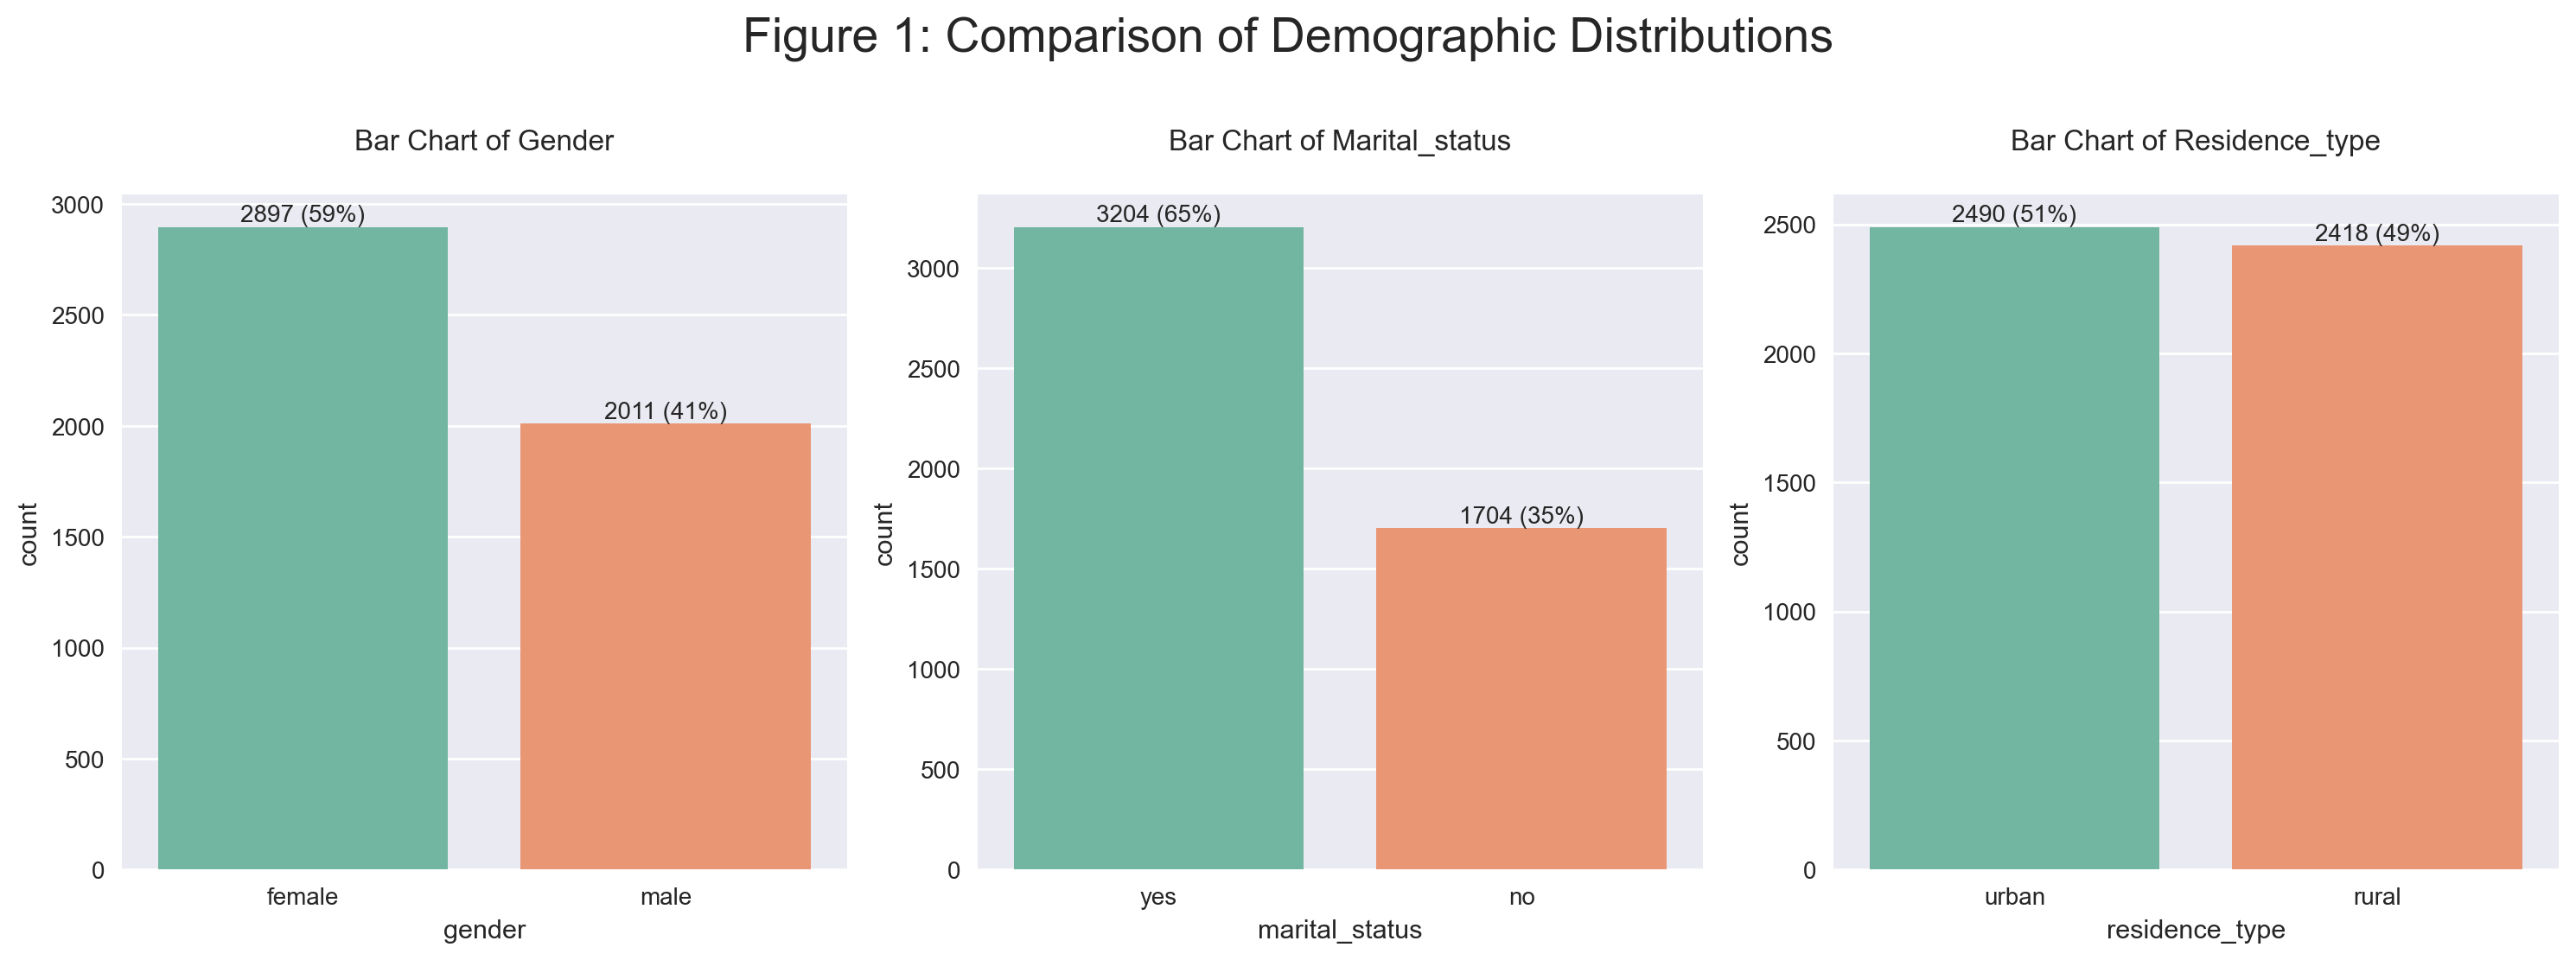

In [25]:
# Adjust the figure size

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
create_barchart_with_percentage(stroke_df, 'gender')

plt.subplot(1, 3, 2)
create_barchart_with_percentage(stroke_df, 'marital_status')

plt.subplot(1, 3, 3)
create_barchart_with_percentage(stroke_df, 'residence_type')

# Adjust subplot layout to prevent overlapping

plt.tight_layout()
plt.suptitle('Figure 1: Comparison of Demographic Distributions', y=1.1, fontsize=20)
plt.show()


In Figure 1, With 59% females and 41% males in our dataset, we observe a slight majority of females. This insight indicates a gender imbalance in our data, which could suggest that females are more prevalent in the population or are more likely to participate in health surveys.

A distribution of marital status shows that 65% of individuals are married, while 35% are not. The interesting difference indicates that a significant portion of the population is married, highlighting the importance of marital status as a demographic factor in stroke risk assessment. 

However, a nearly equal split between urban (51%) and rural (49%) residents is revealed by examining the residence type distribution. This fair distribution leads us to think about lifestyle and environmental aspects of urban and rural living that may affect the risk of stroke.

#### Continuous Features


Next, we will examine the distribution of continuous features, namely age, BMI, and average glucose level. We will use KDE or Kernel Density Estimation to visualise the distribution of each feature.

In [26]:
def create_KDE(df, feature, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current axes if ax is not provided

    sns.kdeplot(df[feature], shade=True, ax=ax)
    
    # Calculate the mean
    mean_value = np.mean(df[feature])
    
    # Overlay a mean line
    ax.axvline(mean_value, color='red', linestyle='--')
    ax.text(mean_value, ax.get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='red', ha='left')
    
    ax.set_xlabel(f'{feature.capitalize()}')
    ax.set_ylabel('Density')
    ax.set_title(f'Kernel Density of {feature.capitalize()} with Mean Line\n')

    return ax

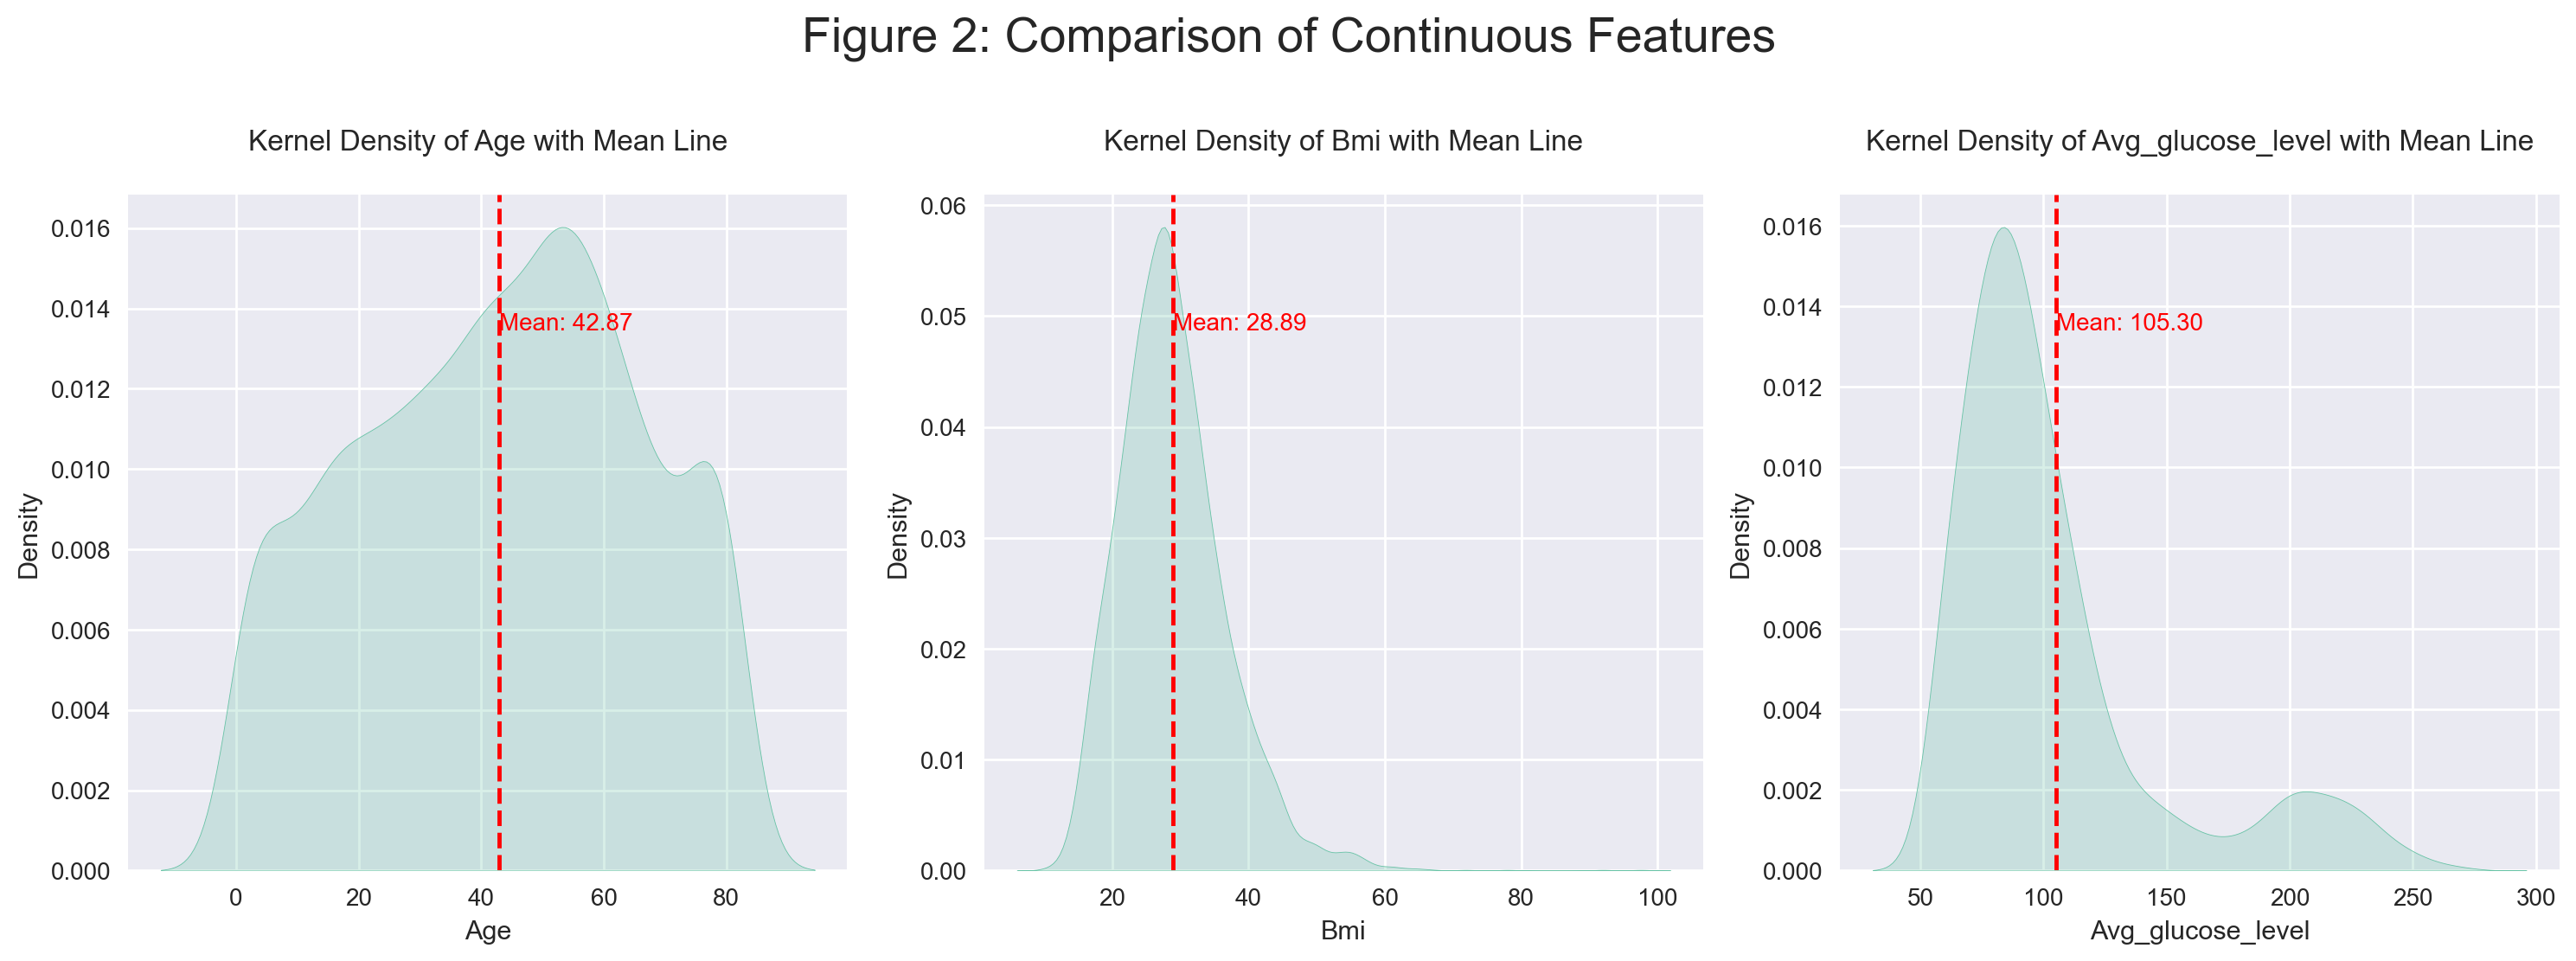

In [27]:
# Create subplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
create_KDE(stroke_df, 'age')

plt.subplot(1, 3, 2)
create_KDE(stroke_df, 'bmi')

plt.subplot(1, 3, 3)
create_KDE(stroke_df, 'avg_glucose_level')

# Adjust subplot layout to prevent overlapping
plt.tight_layout()
plt.suptitle('Figure 2: Comparison of Continuous Features', y=1.1, fontsize=20)
plt.show()

In Figure 2, We can see from the left chart that the age of the population group is almost a normal distribution, slightly skewed to the right, with a mean of 42.87 years. The potentially symmetrical distribution of age suggests that the surveyed population is diverse in terms of age, which could be important for understanding stroke risk factors across different age groups.

From the middle chart, we can observe that the BMI surveyed in this dataset follows a normal distribution, with the majority of people having a BMI slightly below the mean of 28.89. However, the number indicates that the population tends to be overweight [(About Adult BMI, 2022)](#ref05)<a id='cite05'></a> on average, which is a known risk factor for stroke. Monitoring and managing weight could be crucial in stroke prevention strategies for this population.

The right chart shows the distribution of average glucose levels. It can be noticed that the majority of people have blood sugar levels lower than the average of 105.30, but there is also a significant number with higher blood sugar levels, around 200, as indicated by the increasing density towards the right. Individuals with higher blood sugar levels could have a higher risk of stroke and might need particular treatments to lower their risk, like changing their lifestyle or taking medication to control their blood sugar levels.

#### Smoking Status

We're also interested in examining smoking status as it's the fact that smoking is widely recognised as significant contributors to various health issues, including increasing stroke risk.

<AxesSubplot:title={'center':'Figure 3: Bar Chart of Smoking_status\n'}, xlabel='smoking_status', ylabel='count'>

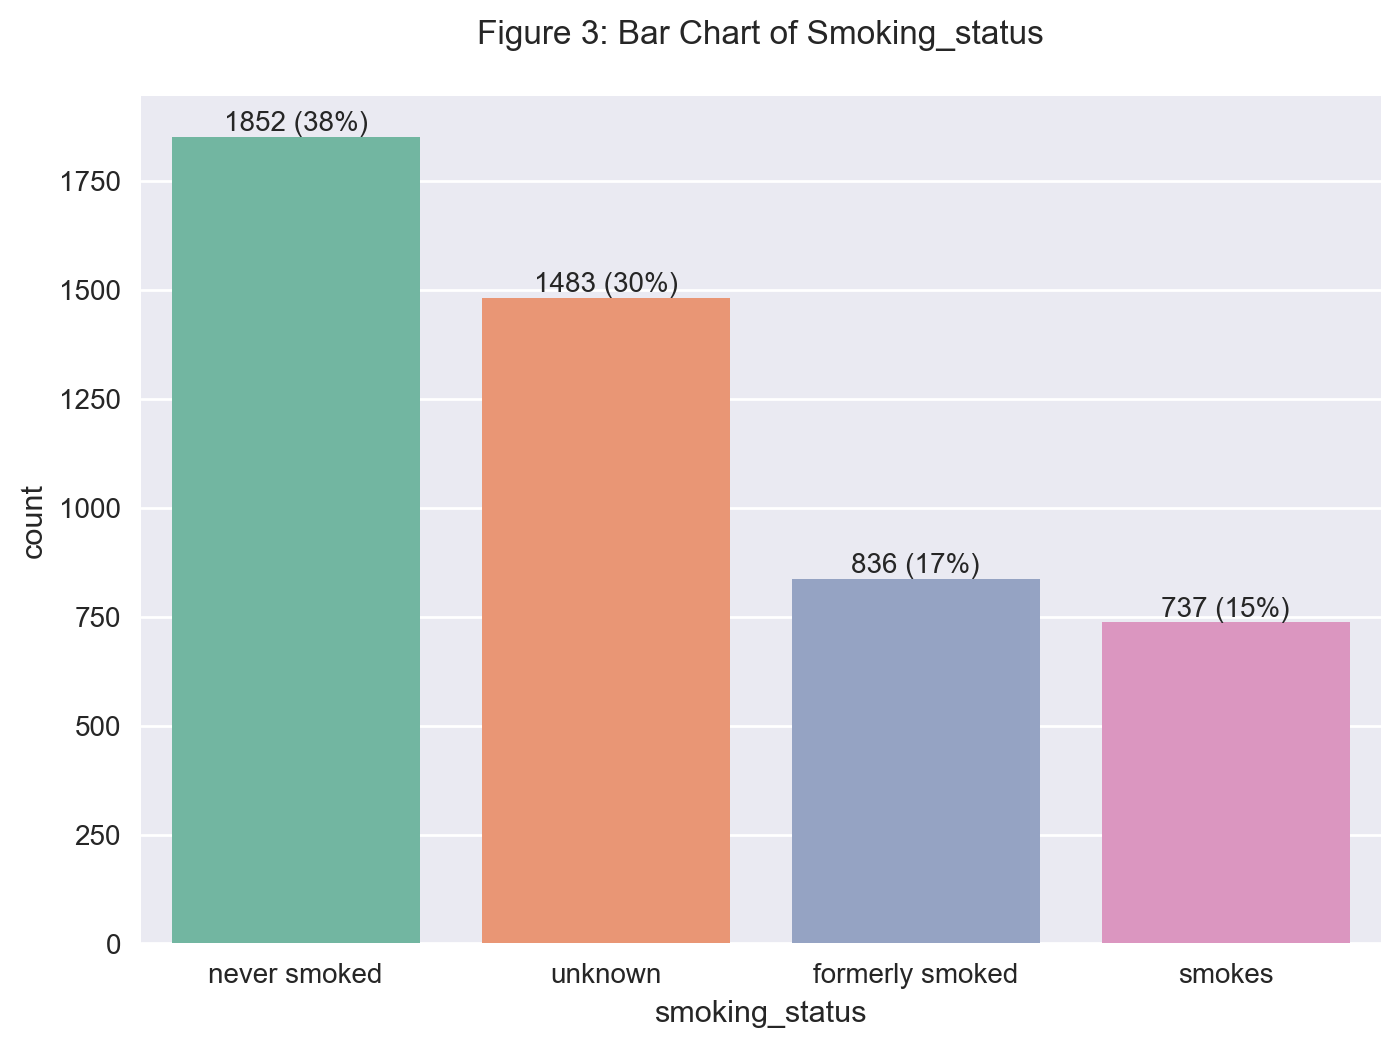

In [28]:
create_barchart_with_percentage(stroke_df,'smoking_status',figNum = 3)

In Figure 3, we found that the majority of the population group studied does not smoke (38%), followed by an unknown status (30%), formerly smoked (17%), and currently smoking, which accounts for around 15% of the population. This implies that compared to non-smokers and people whose smoking status is unknown, the prevalence of smoking may not be as high in this population. Nonetheless, the existence of ex-smokers suggests that some people may have found success with quitting smoking.

#### Stroke

Now, let's examine the number of individuals who have experienced a stroke which is our target.

<AxesSubplot:title={'center':'Figure 4: Bar Chart of Stroke\n'}, xlabel='stroke', ylabel='count'>

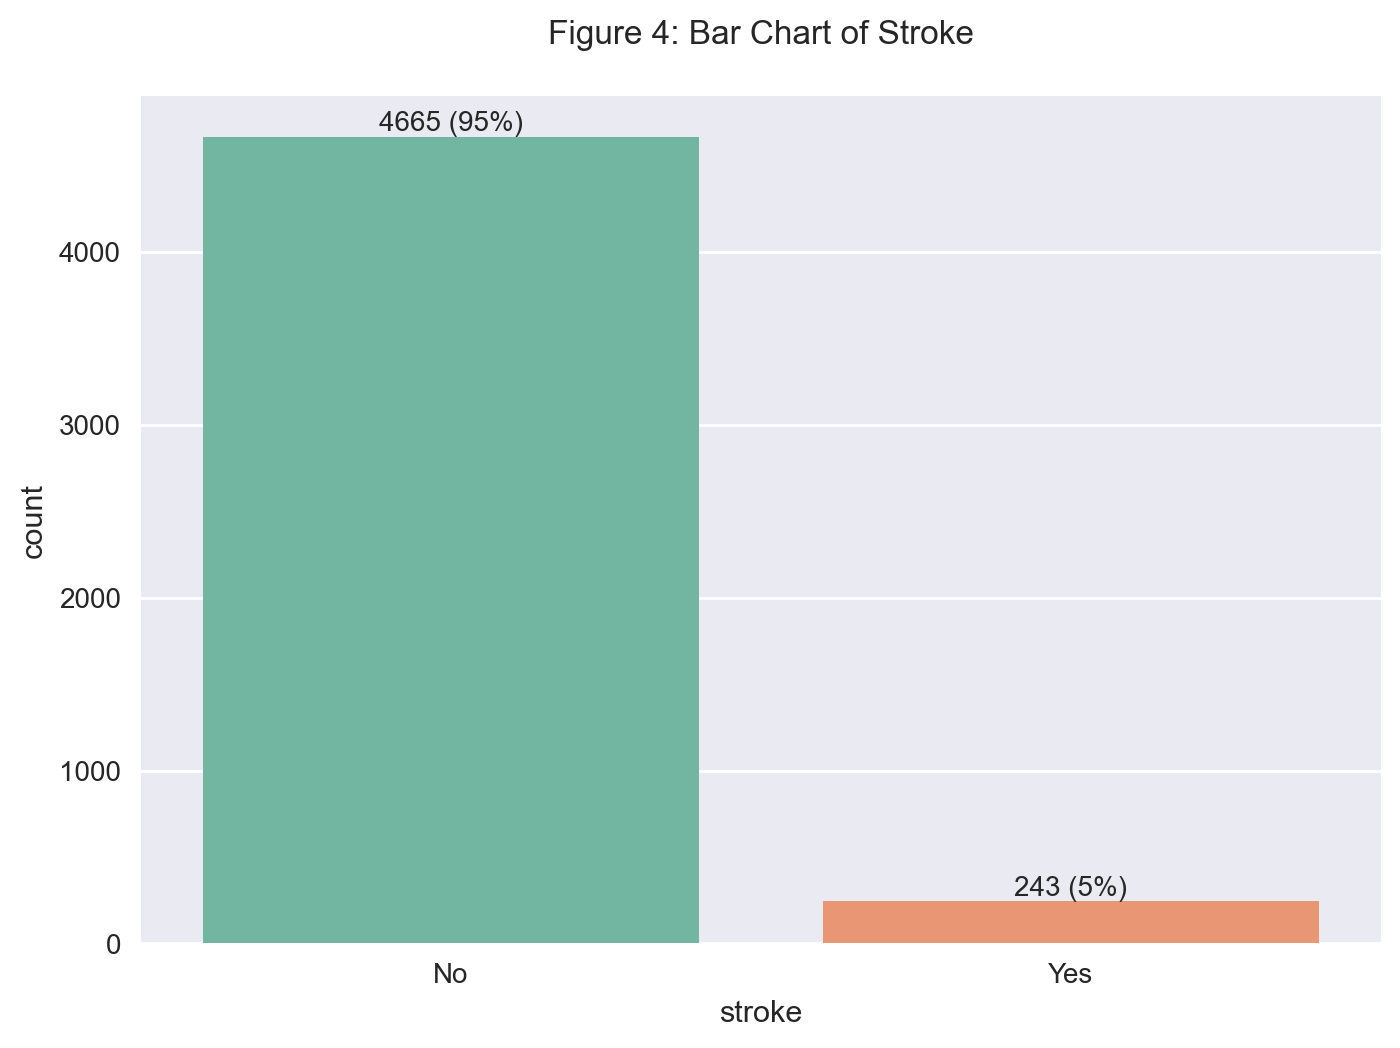

In [29]:
stroke_df_copied = stroke_df.copy()
stroke_df_copied['stroke'] = stroke_df['heart_disease'].map({0: 'No', 1: 'Yes'})
create_barchart_with_percentage(stroke_df_copied,'stroke', figNum=4)

In Figure 4, only 243 people, or about 5% of the 4,908 people surveyed, reported having had a stroke in the past, according to the data in Figure 4. This information implies that there is not a high incidence of stroke in this group. Despite the seemingly low percentage, it's important to understand that stroke is still a serious health risk, even at lower prevalence rates. Knowing the population's prevalence of stroke highlights the significance of ongoing efforts in stroke prevention and management strategies and provides useful information for healthcare planning and resource allocation.

<span style="float:right;">[Back to Table of Contents](#back)</span>

### Two-Variable Visualisation <a id='2v'></a>

#### Gender and Stroke

Let's begin with exploring whether gender influences the likelihood of having a stroke.

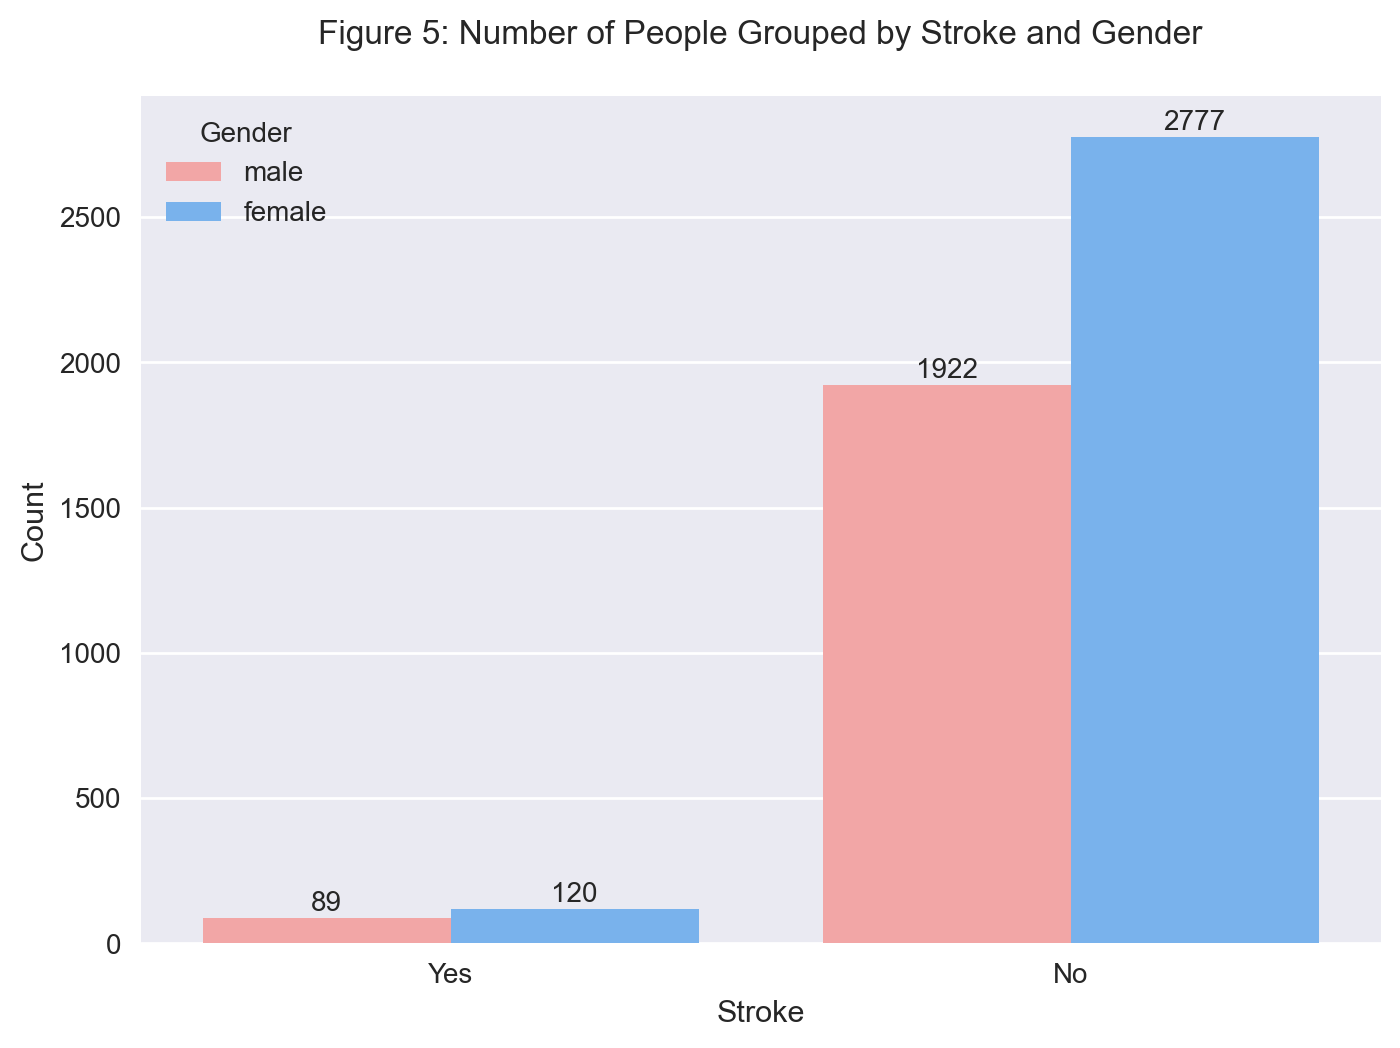

In [30]:
stroke_df_copied = stroke_df.copy()
stroke_df_copied['stroke'] = stroke_df['stroke'].map({0: 'No', 1: 'Yes'})

ax = sns.countplot(x='stroke', hue='gender', data=stroke_df_copied, palette=['#FF9999', '#66B2FF'])

plt.title('Figure 5: Number of People Grouped by Stroke and Gender\n')
plt.xlabel('Stroke')
plt.ylabel('Count')

leg = plt.legend(title='Gender', loc='upper left')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.show()

In Figure 5, among those who have experienced a stroke ("Yes" category), there are 120 females compared to 89 males. Similarly, in the "No" category indicating no history of stroke, there are 2,777 females compared to 1,922 males. It appears that there are more females than males in both categories for stroke. This implies that, regardless of whether they have had a stroke or not, women are more common in both groups. That being said, more statistical analysis should be done in order to obtain more insights.

#### Smoking Status and Stroke

Next, we hypothesise that smoking status may affect the occurrence of stroke. Therefore, we compare the percentage of people who have had a stroke grouped by smoking status.

In [31]:
stroke_df_copied = stroke_df.copy()
stroke_df_copied['stroke'] = stroke_df['stroke'].map({0: 'No', 1: 'Yes'})

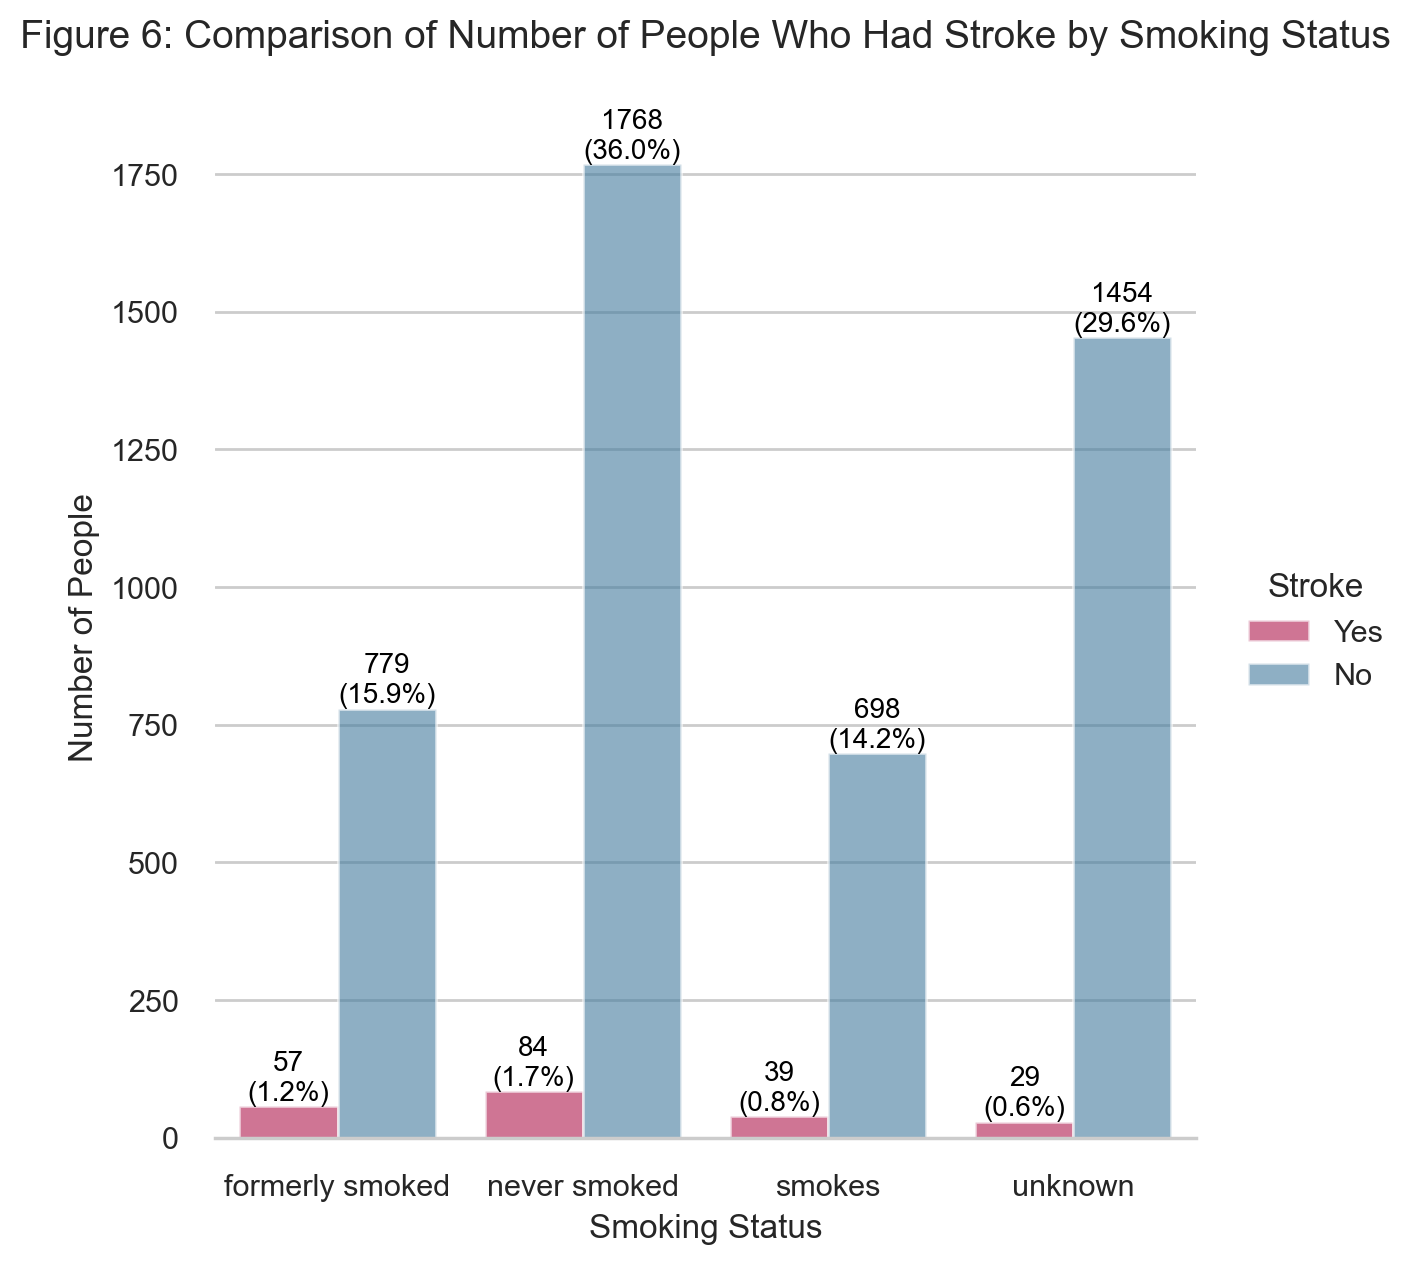

In [32]:
sns.set_theme(style="whitegrid")

# Define color palette
pal = dict(No="#347EAD", Yes="#C80046")

# Create the bar chart
g = sns.catplot(
    data=stroke_df_copied, kind="count",
    x="smoking_status", hue="stroke",
    palette=pal, alpha=.6, height=6)

# Remove spines
g.despine(left=True)

g.set_axis_labels("Smoking Status", "Number of People")

g.legend.set_title("Stroke")

# Add annotations for label and percentage
total_counts = len(stroke_df_copied)
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{y}\n({y/total_counts:.1%})', (x, y), ha='center', va='bottom', fontsize=10, color='black')

# Add title and title number
plt.title('Figure 6: Comparison of Number of People Who Had Stroke by Smoking Status', y=1.05, fontsize=14)

plt.show()

In Figure 6, we found that the percentage of people having a stroke does not differ significantly.

It's evident that the majority of individuals in each smoking status category have not experienced a stroke, as indicated by the higher count of "No stroke" observations compared to "Stroke" observations. However, it's notable that among individuals who have had a stroke, there are varying proportions across different smoking status categories. 

For example, among those who formerly smoked, the proportion of individuals who had a stroke is 1.2%, while among those who never smoked, it is 1.7%. In contrast, individuals who currently smoke or have an unknown smoking status appear to have lower proportions of stroke cases, at 0.8% and 0.6%, respectively. 

These observations suggest that there may be associations between smoking status and stroke risk, with a potentially higher risk among individuals who have never smoked or formerly smoked compared to current smokers or those with unknown smoking status. This contradicts our hypothesis, indicating that there may be other factors influencing the occurrence of stroke.

#### Other Factors and Stoke

Since we already knew that there are factors other than smoking that affect stroke, we will examine whether Age, BMI, and Average Glucose Level are correlated with stroke. We will use `ridge plots` from the `seaborn` library [(Michael Waskom, 2024)](#ref07)<a id='cite07'></a> for this purpose.

In [33]:
def create_ridge_plot(df, target, feature, title = None):
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(2, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row=target, hue=target, aspect=15, height=2, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, feature,
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, feature, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # Add mean line
    def add_mean_line(x, **kwargs):
            mean_val = x.mean()
            plt.axvline(mean_val, color='red', linestyle='--', linewidth=5)  # Change linewidth to 2 for a thicker line
    

    g.map(add_mean_line, feature)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes, fontsize=30)

    g.map(label, feature)

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=0)

    if title == None:
        g.set_titles("")
        g.set(yticks=[], ylabel="")
        plt.xticks(fontsize=30)
        plt.xlabel(f"{feature.capitalize()}", fontsize=25) 
        plt.suptitle(f'{feature.capitalize()} Distribution of {target.capitalize()} and No {target.capitalize()}', fontsize=30)
        g.despine(bottom=True, left=True)
    else:
        g.set_titles("")
        g.set(yticks=[], ylabel="")
        plt.xticks(fontsize=30)
        plt.xlabel(f"{feature.capitalize()}", fontsize=25) 
        plt.suptitle(f'{feature.capitalize()} Distribution of {target.capitalize()} and No {target.capitalize()}', fontsize=30, y=1.05)
        plt.title(f'Figure {title}: Distribution of Age, BMI, and Glucose Level on Stroke\n', fontsize=45, y=2.8)
        g.despine(bottom=True, left=True)

 
    plt.show()


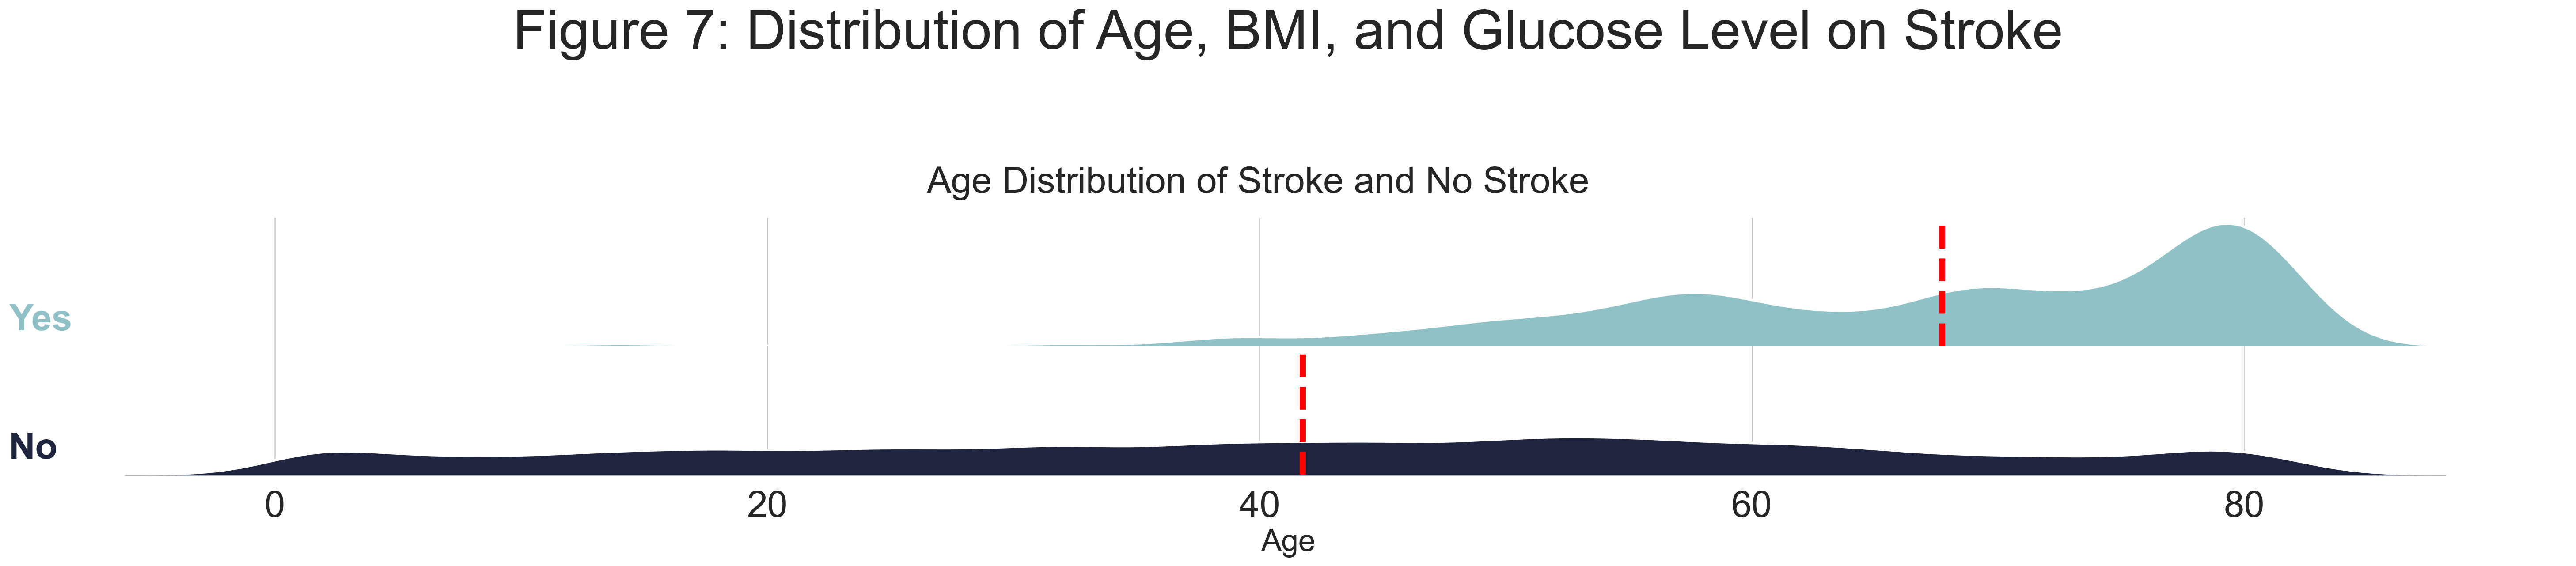

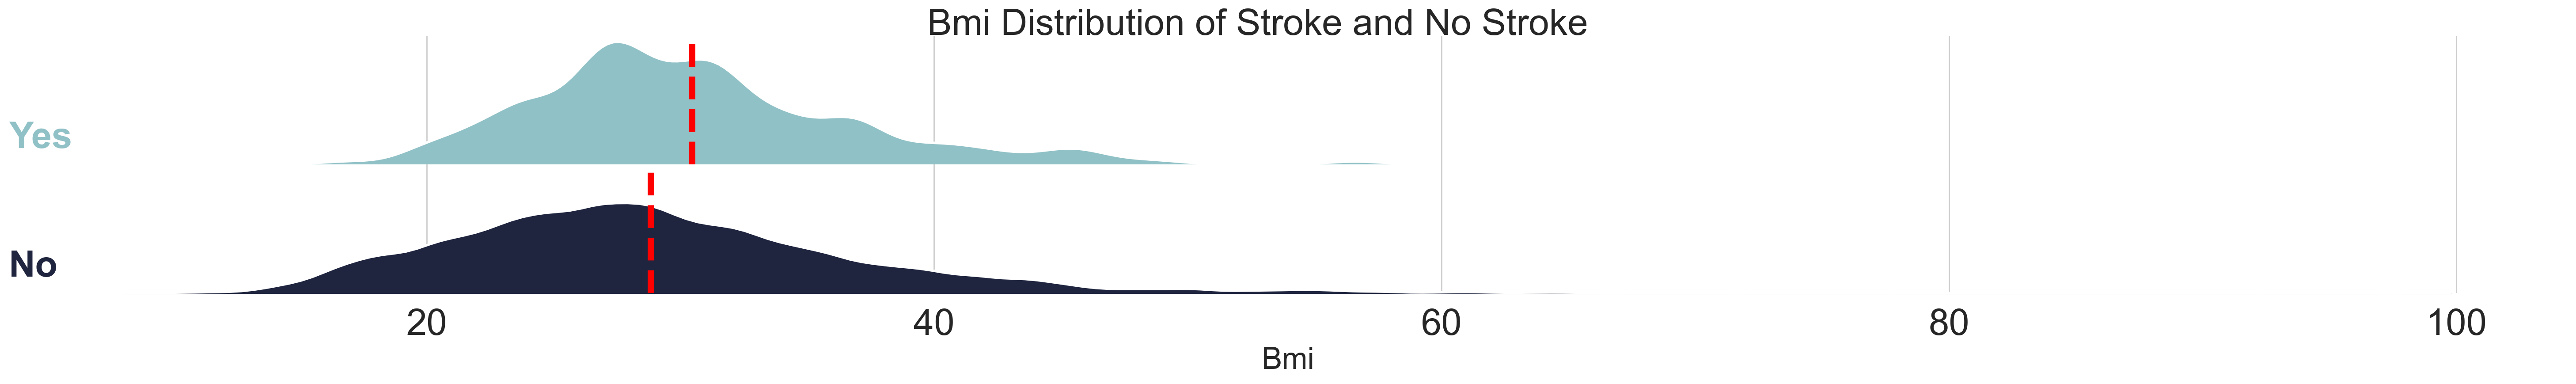

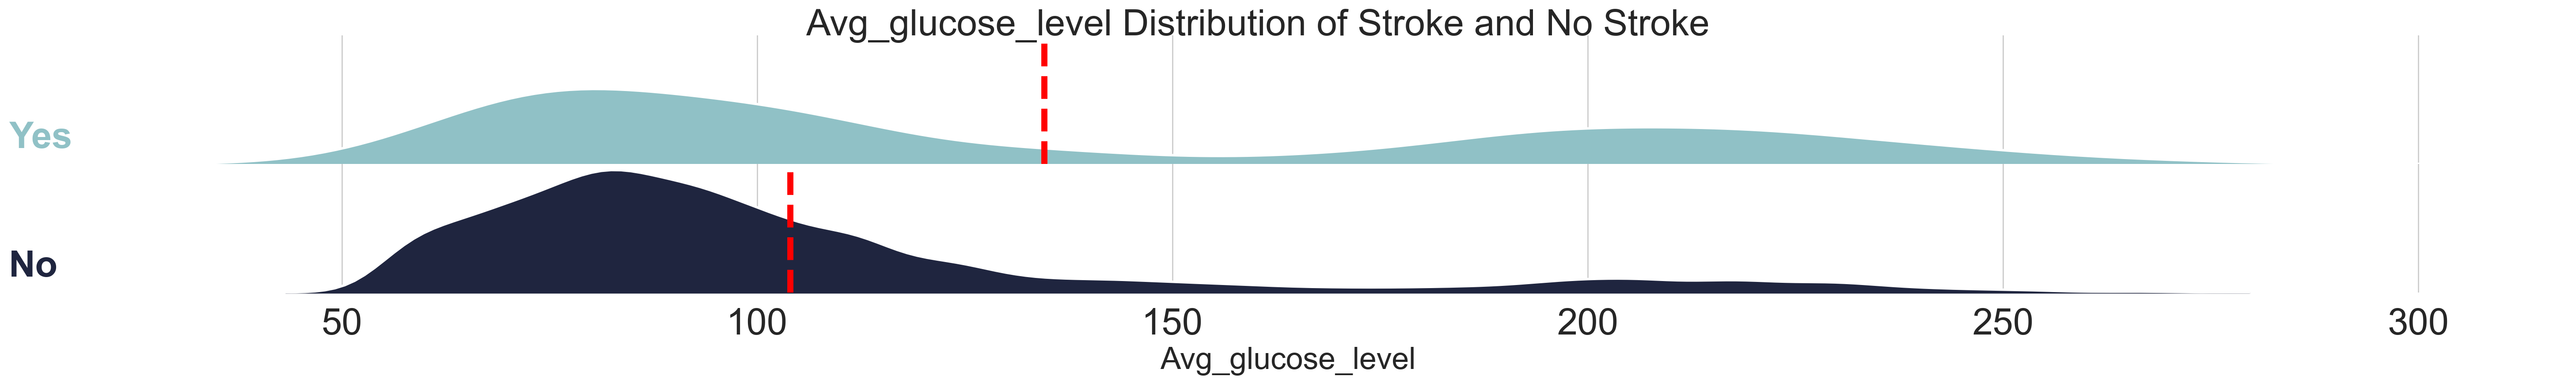

In [34]:
create_ridge_plot(stroke_df_copied,"stroke","age", title =7)
create_ridge_plot(stroke_df_copied,"stroke","bmi")
create_ridge_plot(stroke_df_copied,"stroke","avg_glucose_level")

In Figure 7, it can be observed that individuals who have had a stroke tend to have higher age, BMI, and average blood glucose levels compared to those who have not had a stroke. Therefore, we will focus on these factors as primary causes of stroke.

#### Scatter Plot of BMI and Average Glucose Level

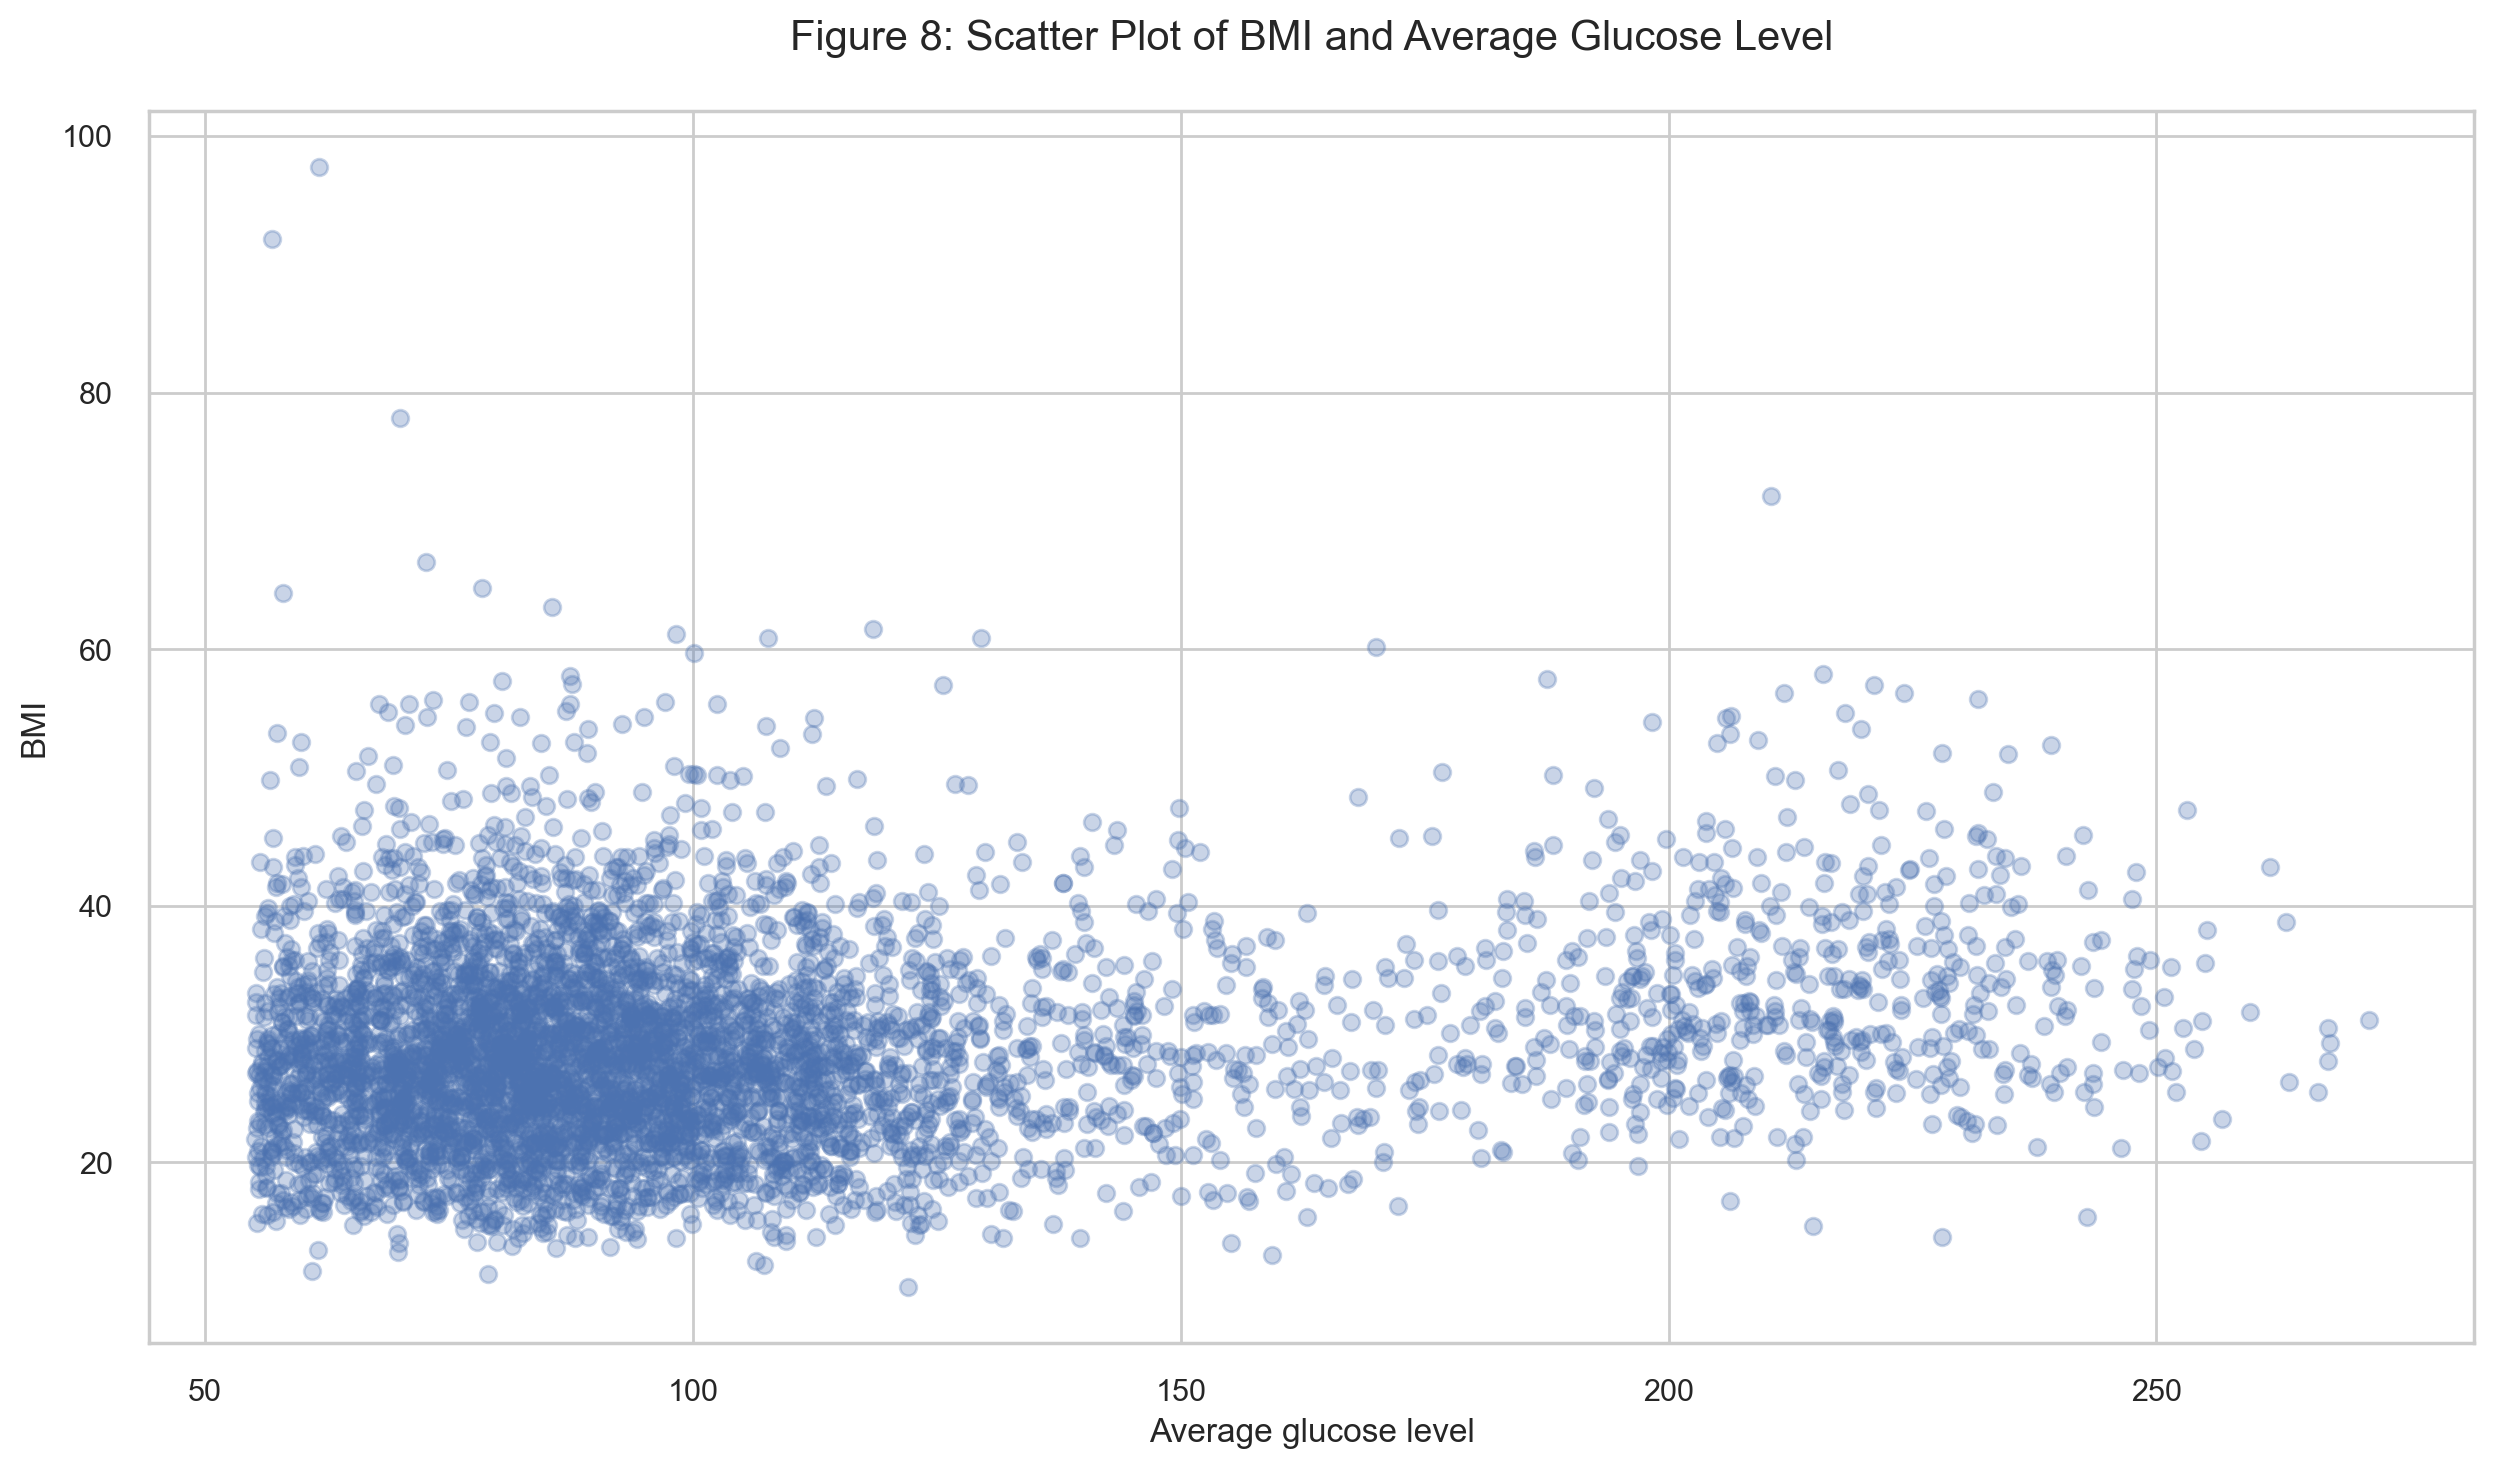

In [35]:
plt.figure(figsize = (15,8))
plt.scatter(stroke_df['avg_glucose_level'], stroke_df['bmi'], alpha = 0.3)
plt.title('Figure 8: Scatter Plot of BMI and Average Glucose Level\n', fontsize = 15)
plt.xlabel('Average glucose level')
plt.ylabel('BMI')
plt.show();

In Figure 8, a scatter plot is used to explore the connection between BMI and average glucose level. Surprisingly, A higher BMI is not always associated with a higher average glucose level. Despite having a high BMI, some individuals show a low average glucose level. This suggests that the association between BMI and average glucose level is not consistently direct or linear. It implies that additional factors may play a role in shaping the relationship between these two variables.

<span style="float:right;">[Back to Table of Contents](#back)</span>

### Three-Variable Visualisation <a id='3v'></a>

#### Scatter Plot of BMI Againts Average Glucose Level with Stroke

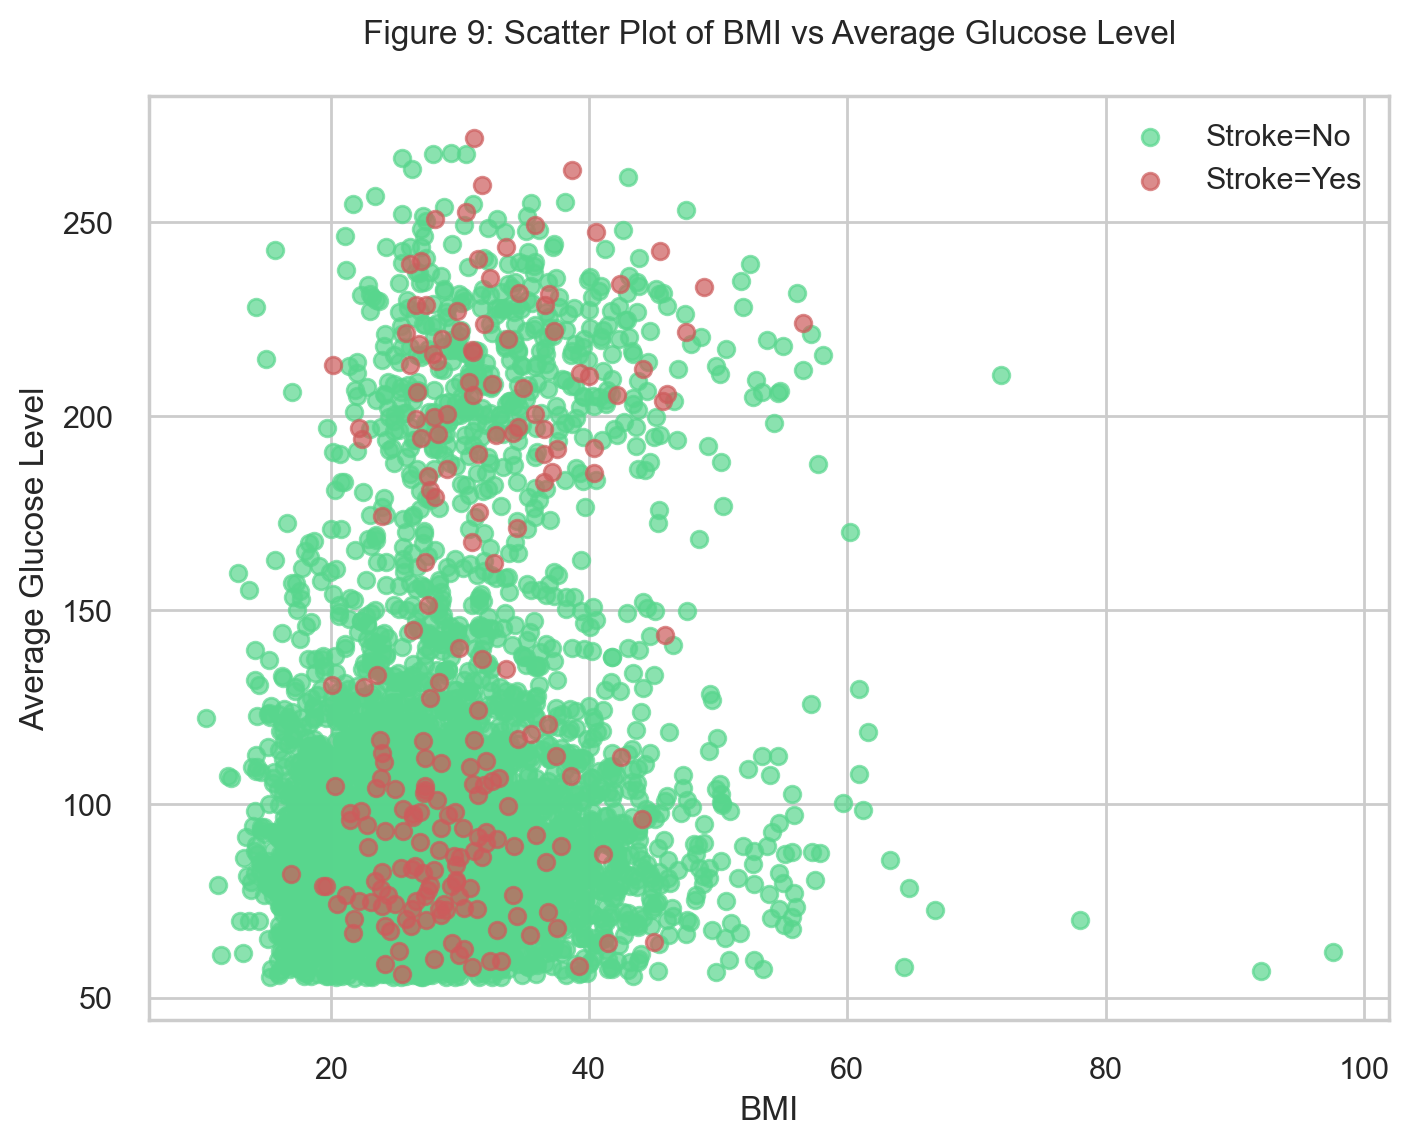

In [36]:
# Assigning colors based on 'stroke' values (1 for red, 0 for green)
colors = stroke_df['stroke'].map({1: '#CD5C5C', 0: '#58D68D'})

plt.figure(figsize=(8, 6))

# Plot green dots first with lower zorder
plt.scatter(stroke_df.loc[stroke_df['stroke'] == 0, 'bmi'], stroke_df.loc[stroke_df['stroke'] == 0, 'avg_glucose_level'], c='#58D68D', alpha=0.7, label='Stroke=No', zorder=2)
# Plot red dots next with higher zorder
plt.scatter(stroke_df.loc[stroke_df['stroke'] == 1, 'bmi'], stroke_df.loc[stroke_df['stroke'] == 1, 'avg_glucose_level'], c='#CD5C5C', alpha=0.7, label='Stroke=Yes', zorder=3)
plt.title('Figure 9: Scatter Plot of BMI vs Average Glucose Level\n')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()


In Figure 9, the scatter plot shows that individuals with stroke status generally have BMI values distributed across a range from approximately 20 to 40, which can be considered high. However, it's important to note that while the majority of BMI values fall within this range, there is still variability within that range. Some individuals with stroke status may have higher BMI values within this range, although the plot does not indicate a strong concentration of high BMI values.

Additionally, the scatter plot also reveals that there is a significant number of participants with elevated average glucose levels despite their BMI falling within the range of 20-40. This observation suggests that there isn't a clear linear relationship between BMI and average glucose levels among individuals with stroke status.

While BMI is often used as an indicator of body weight and obesity, it does not necessarily reflect the metabolic health of an individual. [(Julia Landwehr, 2023)](#ref06)<a id='cite06'></a>
 Therefore, individuals with stroke status may exhibit elevated average glucose levels despite having BMI values within a seemingly healthy range. This underscores the importance of considering factors beyond BMI, such as diet, physical activity, and metabolic health, when assessing the risk factors and outcomes associated with stroke.

#### Bar Chart Comparing the Quantities of Individuals with Hypertension, Heart Disease, and Stroke Based on Marital Status

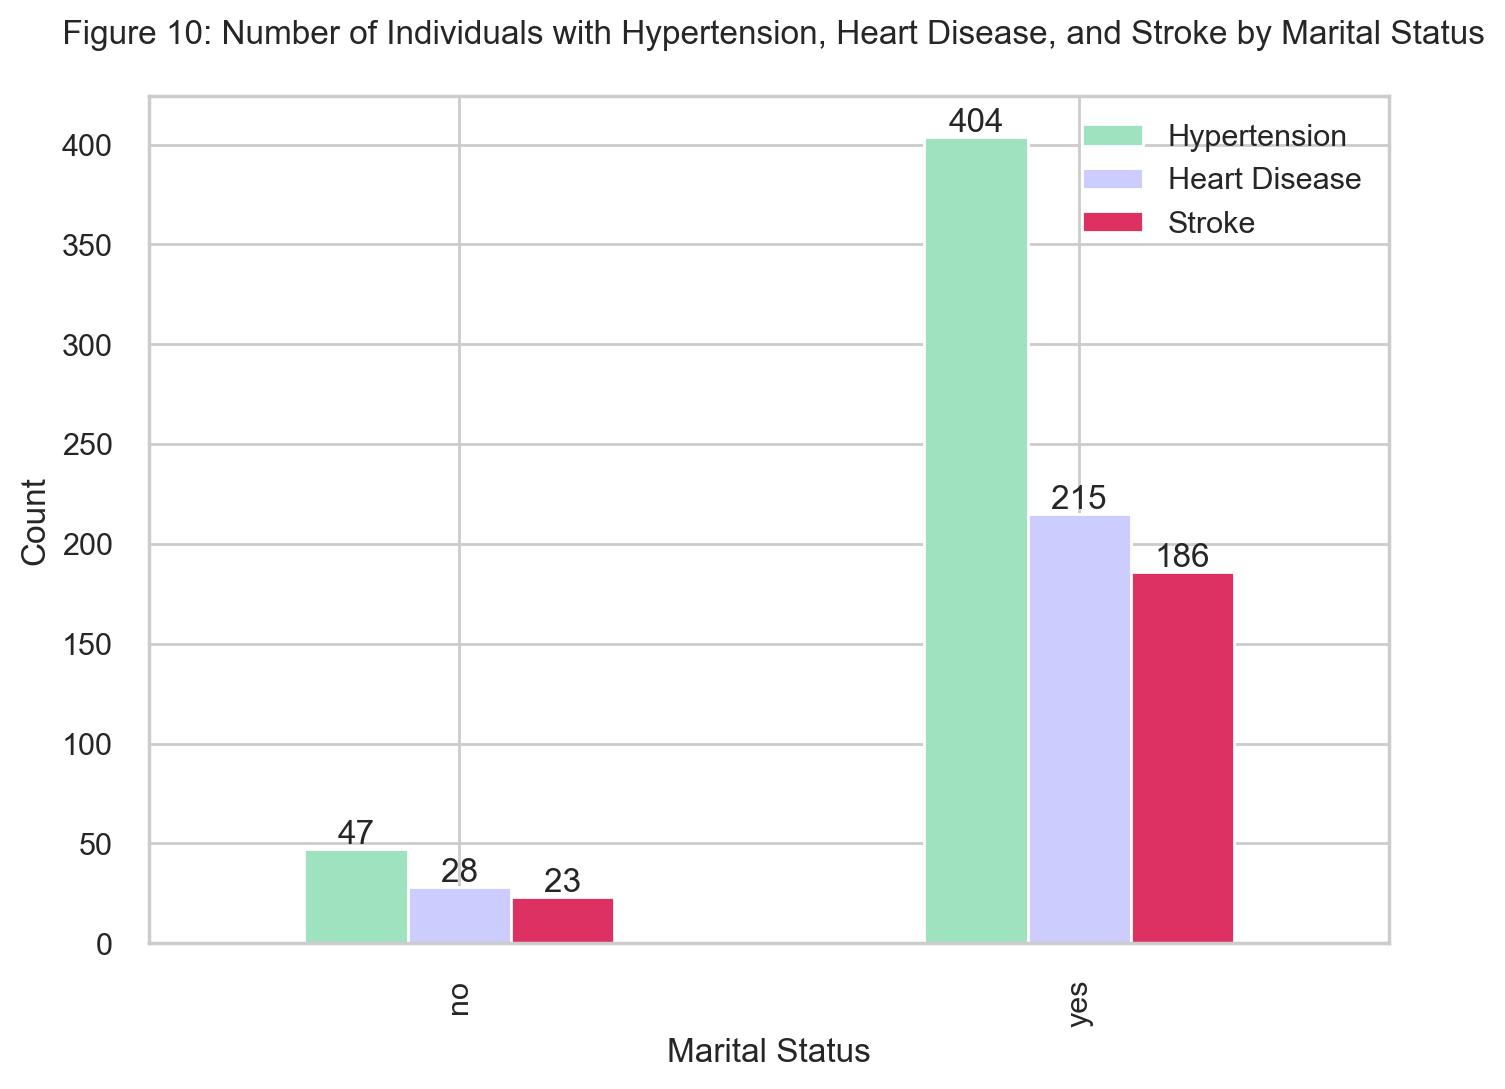

In [37]:
# Count the number of individuals with hypertension, heart disease, and stroke for each marital status
counts = stroke_df.groupby('marital_status')[['hypertension', 'heart_disease', 'stroke']].sum()

# Plot the grouped bar chart with counts and percentages
ax = counts.plot(kind='bar', stacked=False, color = ['#9FE2BF','#CCCCFF','#DE3163'])
plt.title(' Figure 10: Number of Individuals with Hypertension, Heart Disease, and Stroke by Marital Status\n')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(['Hypertension', 'Heart Disease', 'Stroke'])

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In Figure 10, a clear pattern emerges where individuals who are married demonstrate a considerably higher prevalence of hypertension, heart disease, and stroke combined, with the incidence being nearly ten times higher compared to those who have never married. This observation indicates a noteworthy association between marital status and the likelihood of experiencing these health conditions. The substantial difference in prevalence between married individuals and those who have never married suggests that marital status may be a significant factor influencing cardiovascular health outcomes.

#### Boxplot Comparing the Average Glucose Level by Gender and Smoking Status

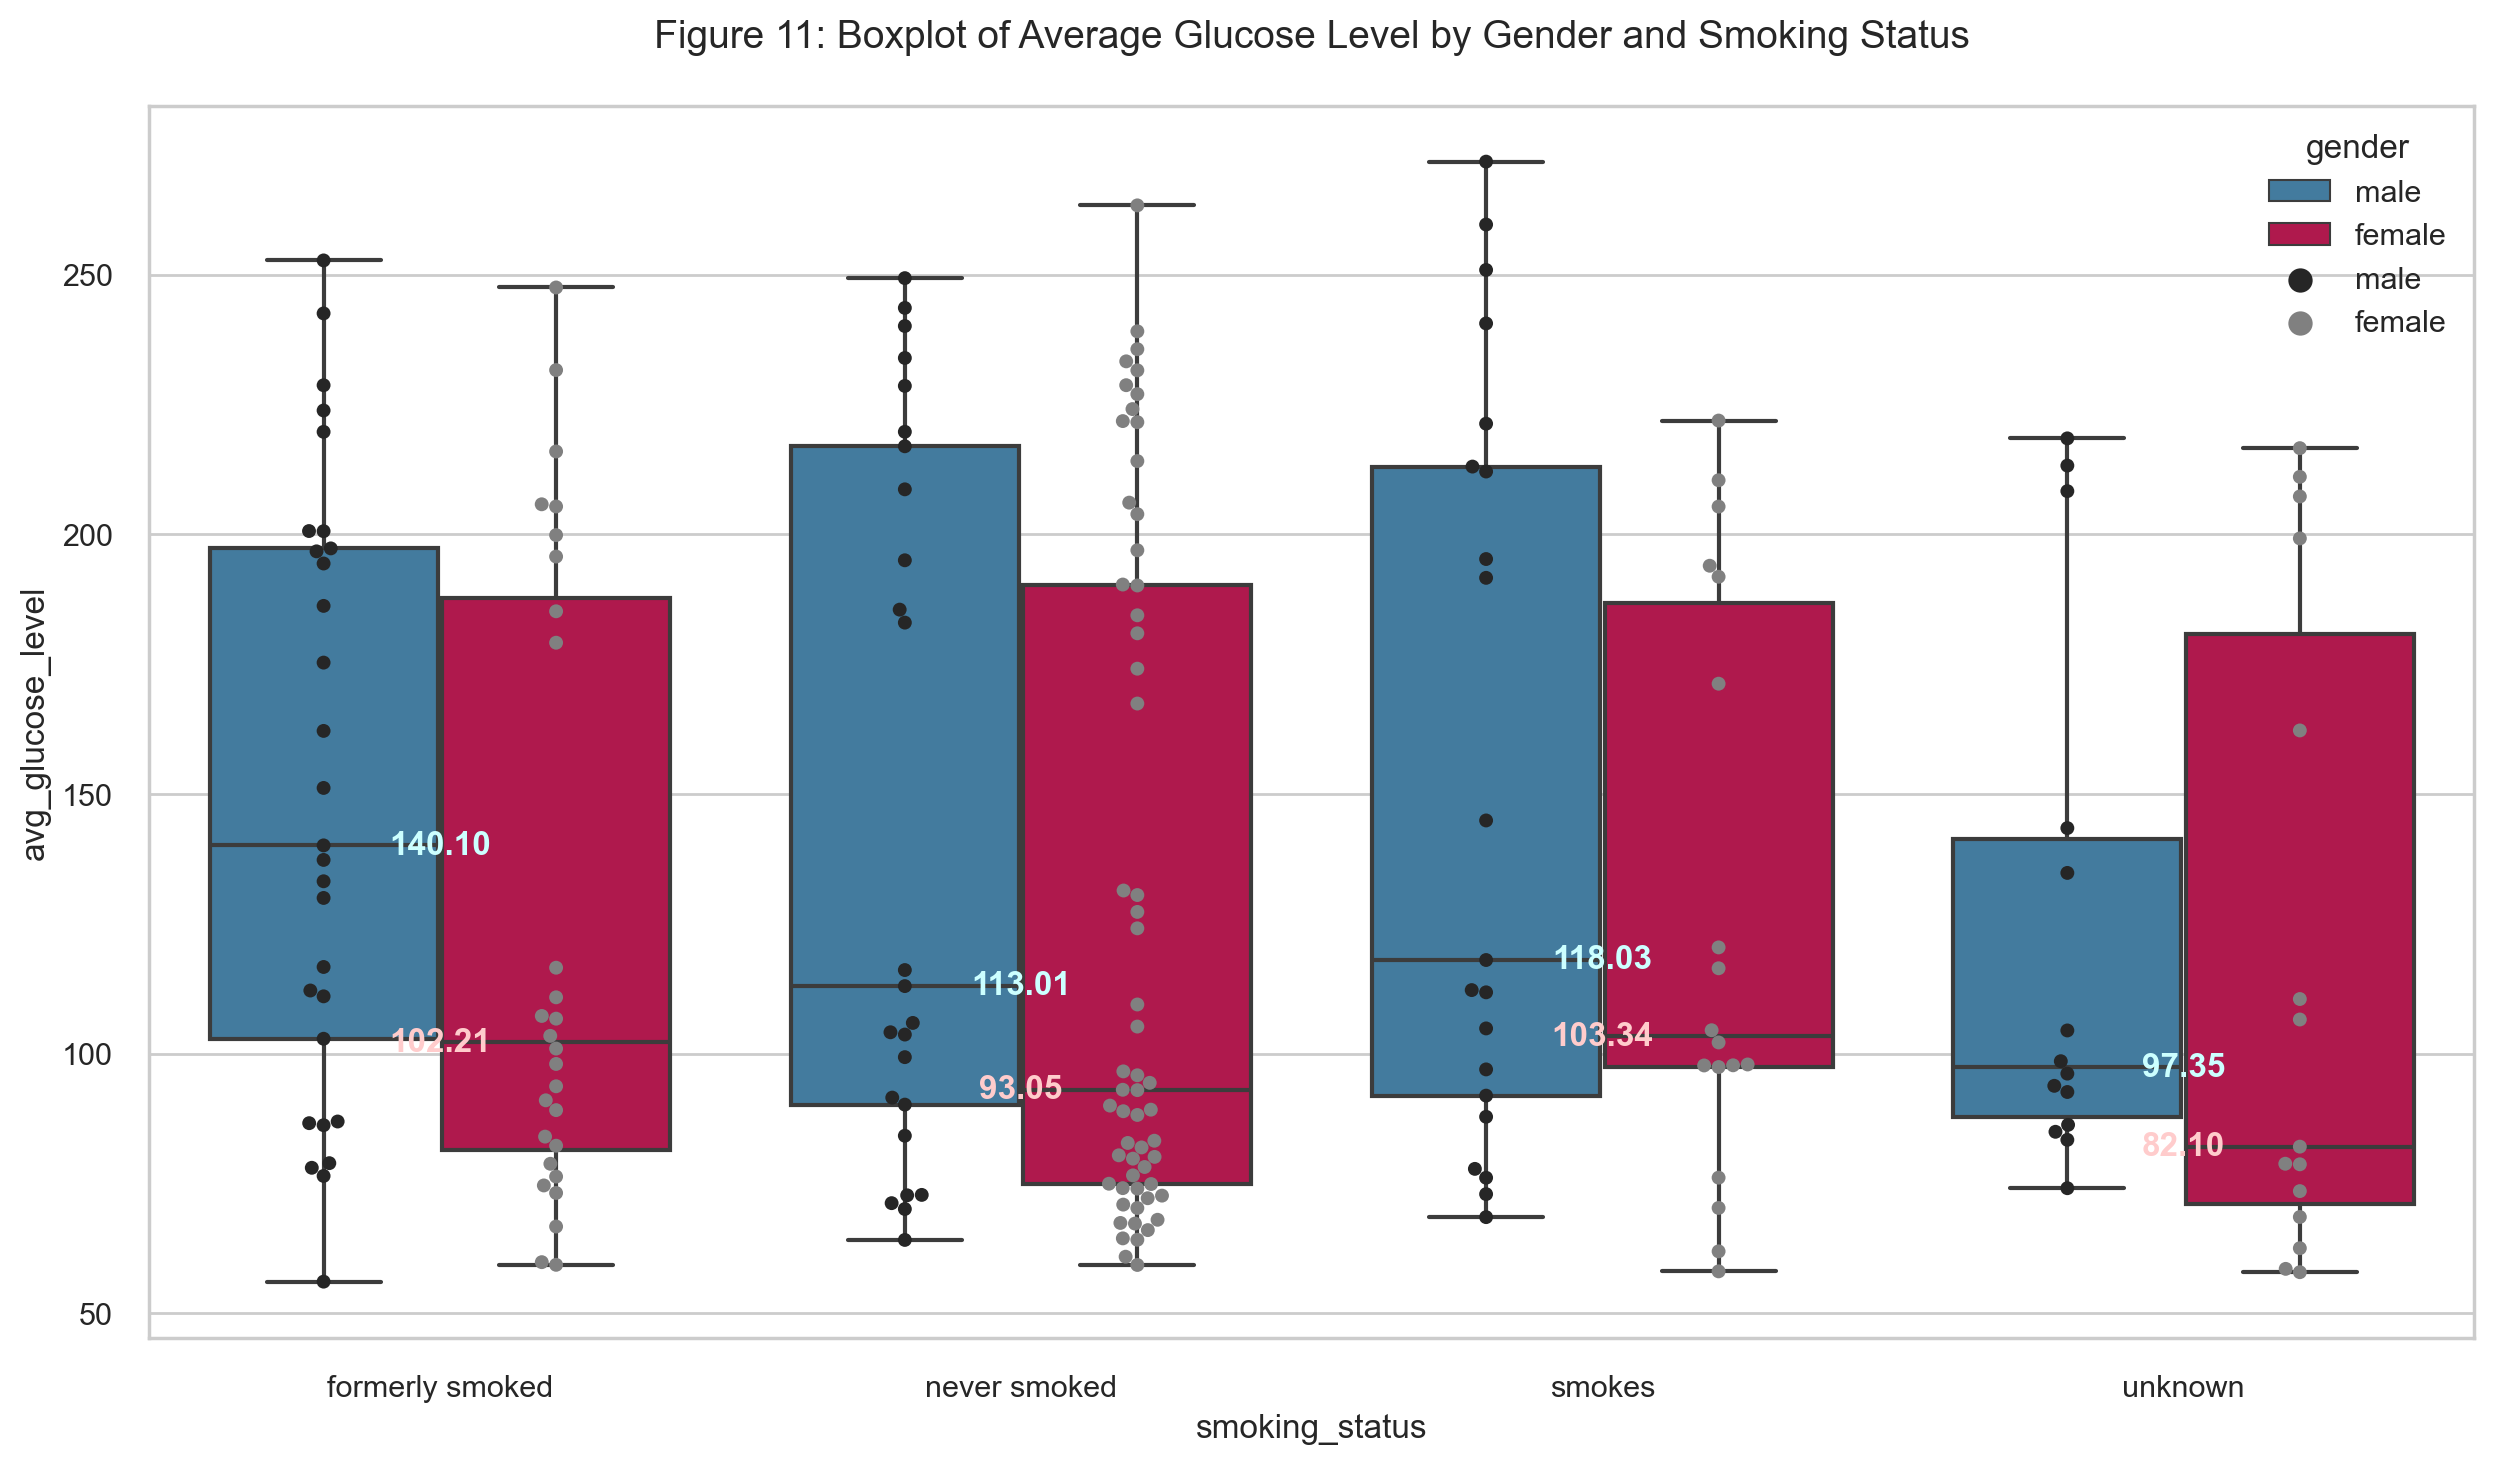

In [38]:
stroke_only = stroke_df[stroke_df['stroke']==1]
pal = dict(male="#347EAD", female="#C80046")

plt.figure(figsize=(15, 8))
ax = sns.boxplot(x=stroke_only['smoking_status'], y=stroke_only['avg_glucose_level'], 
                 hue=stroke_only['gender'], palette=pal,showfliers=False)
sns.swarmplot(x=stroke_only['smoking_status'], y=stroke_only['avg_glucose_level'], 
              hue=stroke_only['gender'], dodge=True, color='grey', size=5)

# Calculate median values for each group
medians = stroke_only.groupby(['smoking_status', 'gender'])['avg_glucose_level'].median()

# Annotate the boxplot with median values
for xtick in ax.get_xticks():
    for hue_tick, hue_color in zip(ax.get_legend().legendHandles, ['#CCFFFF', '#FFCCCC']):  # Colors for the legend
        hue_label = hue_tick.get_label()
        median_val = medians[(ax.get_xticklabels()[xtick].get_text(), hue_label)]
        ax.text(xtick, median_val, f'{median_val:.2f}', 
                ha='center', va='center', color=hue_color, fontweight='bold')

plt.title('Figure 11: Boxplot of Average Glucose Level by Gender and Smoking Status\n', fontsize=14)
plt.show()

#### Boxplot of average glucose level by gender and smoking status

In Figure 11, the chart specifically focuses on individuals who have experienced a stroke. 

It indicates that among stroke patients, men tend to exhibit a higher median average glucose level than women. This gender difference in glucose levels may reflect underlying physiological variations between men and women, potentially influenced by hormonal factors or differences in metabolic regulation.

The chart also highlights a noteworthy association between smoking habits and elevated average glucose levels among stroke patients. Both individuals with a history of smoking and current smokers demonstrate higher average glucose levels compared to those who have never smoked. This suggests that smoking behaviour may contribute to abnormal glucose metabolism in stroke patients. Smoking is known to have negative effects on cardiovascular health and metabolic function, including insulin resistance and impaired glucose tolerance [(J Thorac Dis., 2020)](#ref08)<a id='cite08'></a>, which could explain the observed correlation with elevated glucose levels among stroke patients.

#### Impact of Heart Disease and Age on Stroke


We are also interested in whether having chronic conditions such as heart disease or high blood pressure affects the occurrence of stroke.

To investigate this, we will utilise `lmplot` from the `seaborn` library [(Michael Waskom, 2024)](#ref09)<a id='cite09'></a> to create faceted logistic regression [5]. We will select an additional factor, age, to compare and determine if chronic conditions have a significant impact. If the area of the graph expands, it indicates that chronic conditions have a direct effect on stroke. Conversely, if the graph's area does not expand, it suggests that age plays a more significant role, and chronic conditions have no effect.
.

In [39]:
def create_implot(df, x, y, col, hue, figureNum=None):
    pal = dict(male="#347EAD", female="#C80046")

    # Show the survival probability as a function of age and sex
    g = sns.lmplot(x=x, y=y, col=col, hue=hue, data=df,
                   palette=pal, y_jitter=.002, logistic=True, truncate=False)
    g.set(xlim=(0, 80), ylim=(-.05, 1.05))
    
    # Add title at the top
    g.fig.suptitle(f'Figure {figureNum}: Impact of {col.capitalize()} and Age on Stroke\n', fontsize=14, y=1.05)
    

In [40]:
stroke_df_copied = stroke_df.copy()
stroke_df_copied['heart_disease'] = stroke_df['heart_disease'].map({0: 'No', 1: 'Yes'})
stroke_df_copied['hypertension'] = stroke_df['hypertension'].map({0: 'No', 1: 'Yes'})

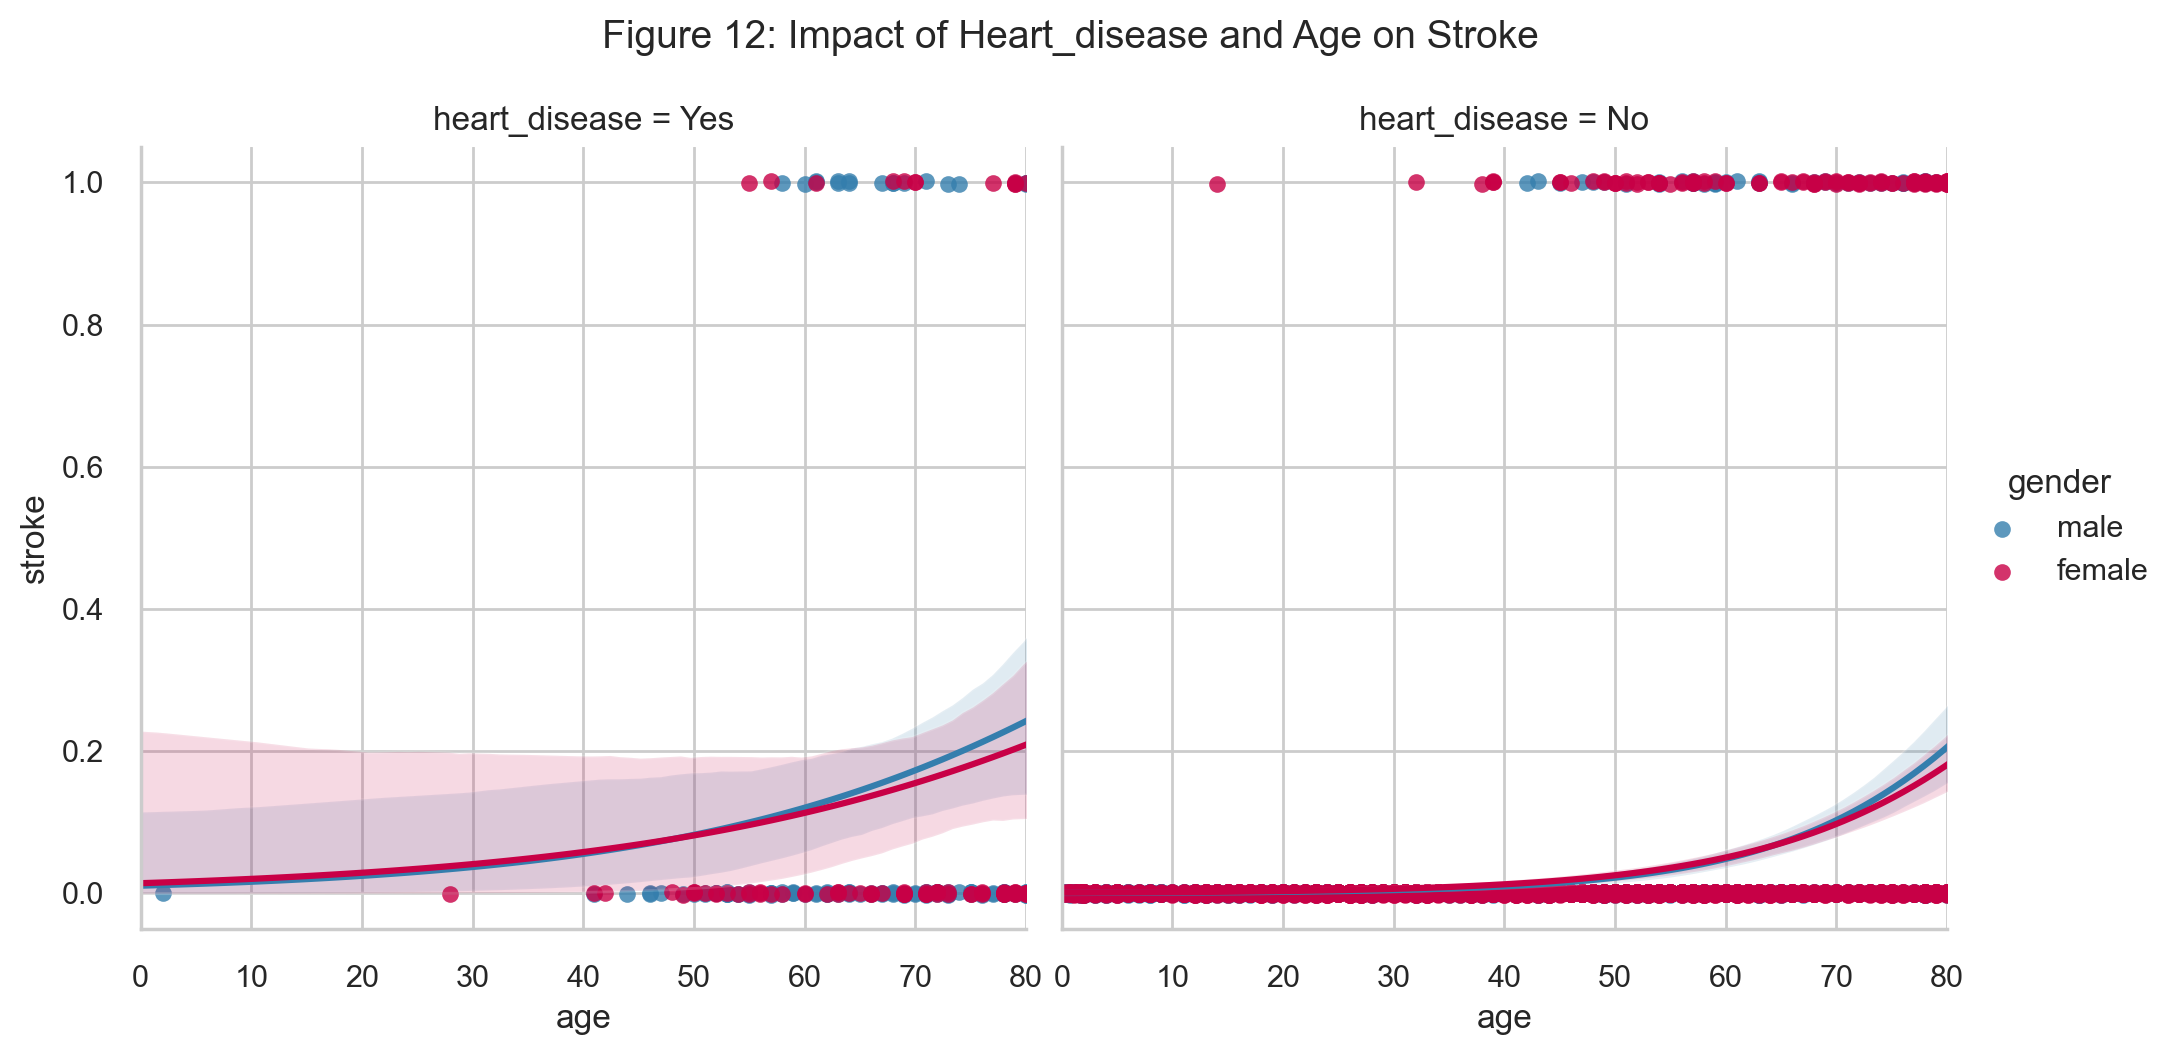

In [41]:
create_implot(stroke_df_copied,"age","stroke","heart_disease","gender",12)

In Figure 12, it is evident that having heart disease significantly increases the likelihood of stroke, as the graph's area expands notably. Conversely, not having heart disease is clearly distinct.


#### Impact of Hypertension and Age on Stroke

Similarly in Figure 13, with high blood pressure, as shown in figure 13, the expanded area of the graph compared to those without high blood pressure indicates that hypertension significantly contributes to stroke occurrence.

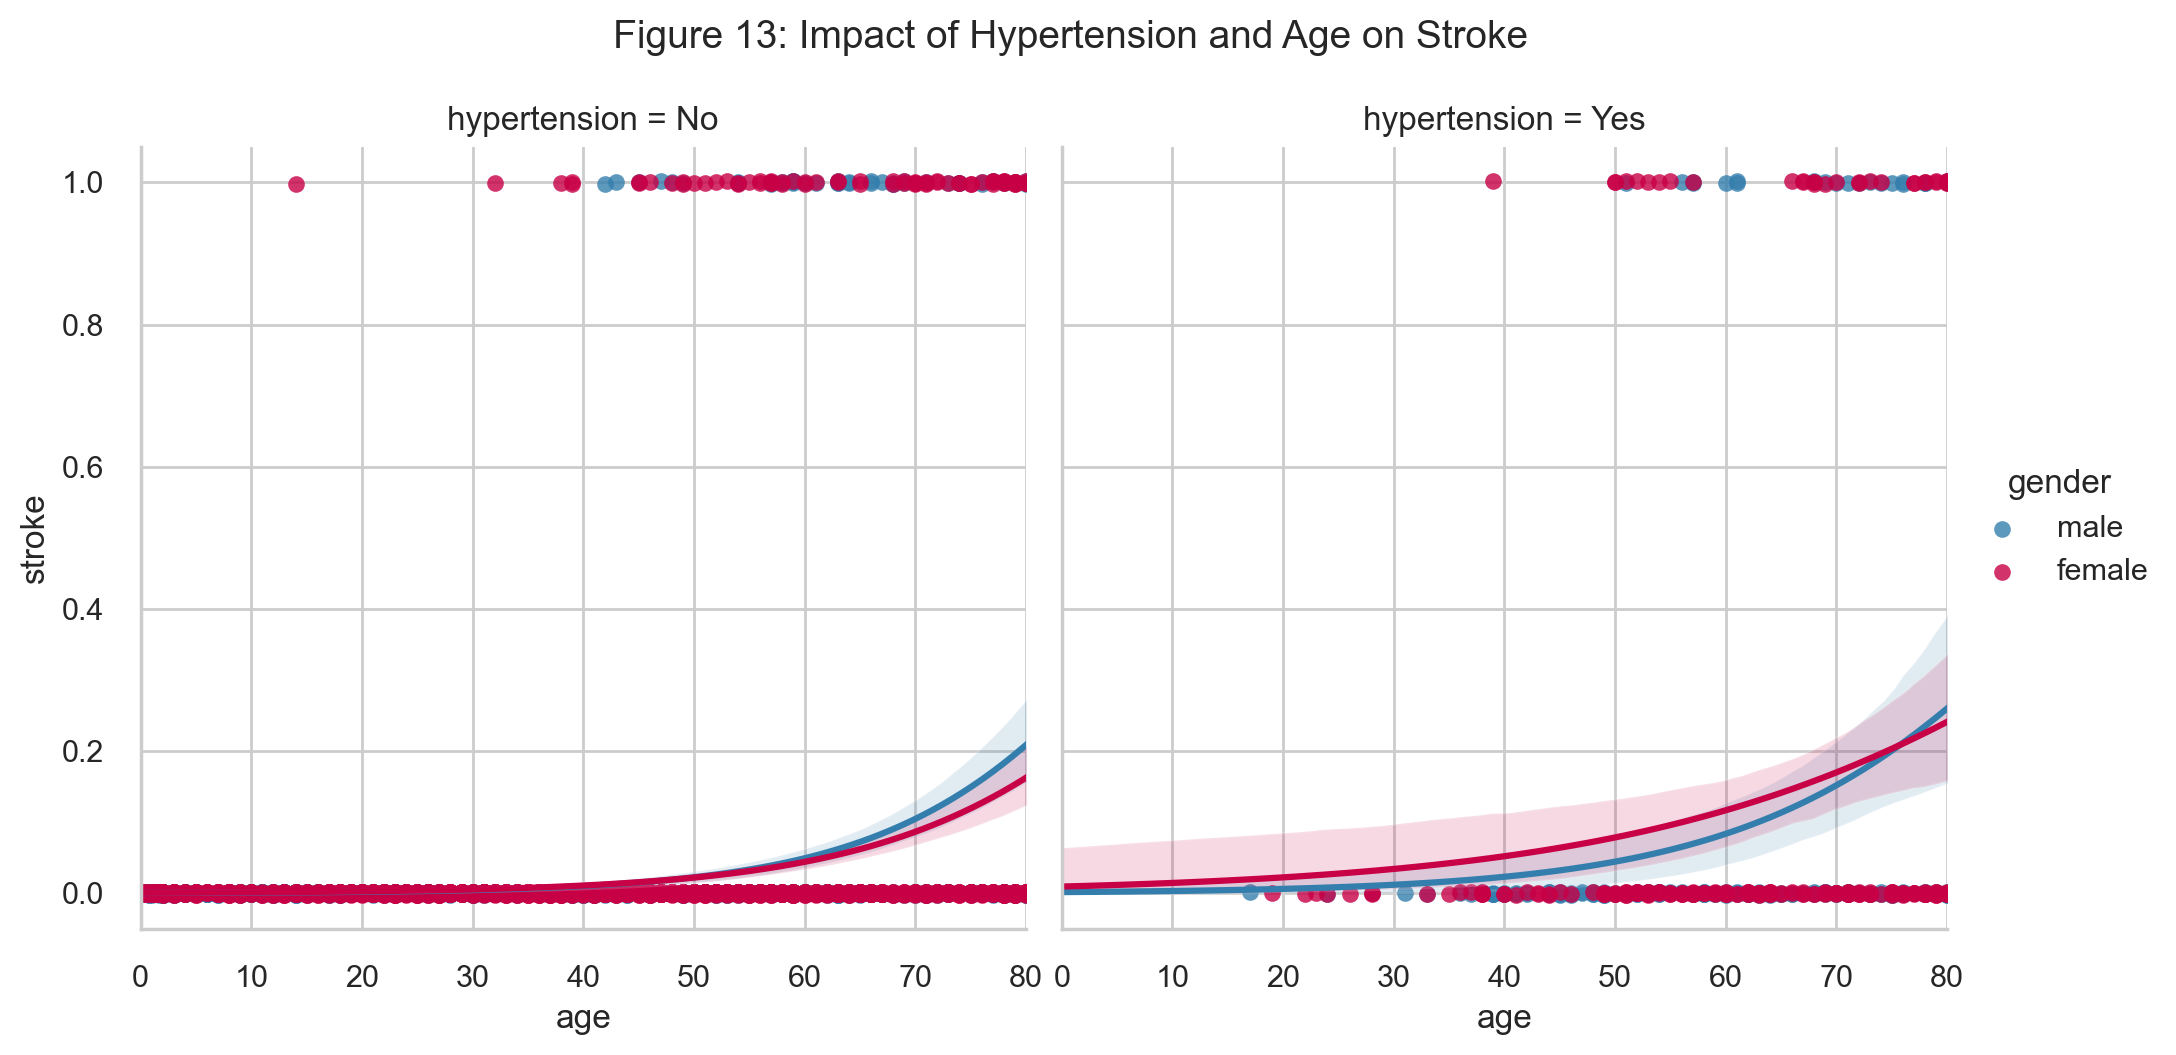

In [42]:
create_implot(stroke_df_copied,"age","stroke","hypertension","gender",13)

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Literature Review <a id='lr'></a>

### Introduction

Stroke stands as a primary cause of illness and death on a global scale. Around 15 million people suffer a stroke each year globally. Of these, 5 million lose their lives, and another 5 million are left with lasting disabilities, creating significant burdens for families and communities. [(Robby Berman, 2023)](#ref11)<a id='cite11'></a> Grasping the intricate relationship between various factors contributing to stroke occurrence is crucial for devising effective strategies for prevention and treatment. This literature review intends to explore and assess key factors affecting stroke risk, with a focus on smoking behaviour, gender-based variations, the impact of diabetes, and the effect of high-density lipoprotein cholesterol.

### Section 1: Smoking and Stroke

#### Overview

Cigarette smoking significantly increases the risk of stroke, yet tobacco use remains prevalent despite awareness of its dangers. Around one in five US adults smoke regularly, often starting in their teens. [(Centers of Disease Control and Prevention, n.d.)](#ref10)<a id='cite10'></a> Scientific evidence highlights a strong link between smoking intensity and stroke risk. [(National Institutes of Health. 2020)](#ref12)<a id='cite12'></a>

#### Key Finding

Numerous global studies consistently reveal that people who currently smoke have a risk of stroke that is two to four times higher than those who have never smoked or who stopped smoking more than ten years ago. Additionally, exposure to secondhand smoke significantly increases stroke risk in nonsmokers. Quitting smoking reduces stroke risk by 50-60% across diverse populations. [(Amelia K. Boehme et al., 2017)](#ref13)<a id='cite13'></a> 

These findings highlight the substantial impact of smoking on stroke risk reduction. However, smoke-free laws and tobacco control programs have shown promise in reducing smoking rates and improving public health. [(Richard P Sargent et al., 2004)](#ref14)<a id='cite14'></a> Banning smoking in public areas is crucial to protect nonsmokers from secondhand smoke. Society has the opportunity to work towards a smoke-free future, benefiting both smokers and nonsmokers.

#### Limitation

The limitations of this literature include potential biases in the studies cited, such as selection bias or confounding factors not adequately controlled for. Additionally, while raising tobacco prices has been shown to reduce tobacco use, its impact may be limited by socioeconomic factors. Finally, the feasibility and societal acceptance of completely banning smoking in public areas may face challenges.

### Section 2: Gender and Stroke

#### Overview

According to recent research, women may experience delayed diagnosis and treatment for strokes compared to men because of gender-based differences in how the symptoms present. Although both sexes are open to the classic signs of stroke, such as facial drooping, arm weakness, and difficulty speaking, women may also experience additional or unusual symptoms. [(Claire L. Gibson & Luke Attwood, 2016)](#ref15)<a id='cite15'></a>

#### Key Finding

Gender plays a complex role in susceptibility to ischemic stroke and its underlying pathology. Research indicates that male and female hormones contribute to stroke risk in different ways. In men, a decline in testosterone as they age is associated with a higher risk of stroke, while young men with elevated testosterone levels may also be at greater risk. These findings suggest that hormone levels can have a significant impact on stroke susceptibility, but in varying directions depending on age and gender. [(Nidia Quillinan et al., 2014)](#ref16)<a id='cite16'></a>

In addition, women are generally more adept at recognising classic stroke symptoms, but they are also more likely to encounter unusual symptoms, which can lead to misdiagnoses and delayed treatment. Furthermore, women tend to experience greater disability and reduced quality of life after a stroke compared to men. This disparity can be attributed to factors like age-related difficulties, variations in brain lesion patterns, and differences in the level of social support they receive. [(Karina Gasbarrino et al., 2021)](#ref17)<a id='cite17'></a>

#### Limitation

The precise role of sex hormones and chromosomes in influencing stroke risk and development is not yet fully understood, highlighting the need for additional research, particularly in human studies. Moreover, the wide-ranging causes and effects of strokes complicate the identification of the specific impact of gender-related factors, suggesting that larger, long-term studies are needed to gain clearer insights.

### Section 3: Diabetes and Stroke

#### Overview

Diabetes is a chronic condition marked by high blood sugar levels. Poorly managed diabetes can result in a range of complications, including a heightened risk of cardiovascular diseases such as stroke. This is particularly true for Type 2 diabetes, which accounts for nearly 90% of all diabetes cases. [(Centers of Disease Control and Prevention, n.d.)](#ref18)<a id='cite18'></a> Individuals with diabetes are more likely to develop issues like high blood pressure, heart attacks, and elevated cholesterol compared to those without diabetes. Even prediabetes, defined by impaired glucose tolerance or a combination of impaired fasting glucose and impaired glucose tolerance, has been linked to an increased risk of stroke. [(Meng Lee et al., 2012)](#ref19)<a id='cite19'></a>

#### Key Finding

Diabetes, particularly Type 2 diabetes, is known to significantly increase the risk of both ischemic and hemorrhagic strokes. Ischemic strokes occur when there's a blockage in the blood vessels supplying the brain, while hemorrhagic strokes happen when a blood vessel ruptures, leading to bleeding in or around the brain. [(Johns Hopkins Medicine, n.d.)](#ref21)<a id='cite21'></a> The higher risk among diabetic individuals is likely due to the impact of diabetes on blood vessels and other cardiovascular factors.

Epidemiological studies have established a clear association between diabetes and stroke incidence. Adjusted hazard ratios, which consider other contributing factors like age, gender, and lifestyle, still demonstrate that people with diabetes face a significantly higher risk of having a stroke. This suggests that the impact of diabetes on stroke risk is substantial even when accounting for other variables.[(Rong Chen et al., 2016)](#ref20)<a id='cite20'></a>

The mechanisms behind this increased risk are complex but are largely related to how diabetes affects blood vessels and overall cardiovascular health. Diabetes can lead to conditions like atherosclerosis, where arteries harden and narrow due to plaque buildup, increasing the risk of blood clots and vessel rupture. [(Mayo Clinic Staff, 2022)](#ref22)<a id='cite22'></a> Additionally, diabetes is associated with other factors that contribute to stroke risk, such as high blood pressure, high cholesterol, and obesity, all of which can further elevate the likelihood of both ischemic and hemorrhagic strokes. [(Samy I. McFarlane et al., 2017)](#ref23)<a id='cite23'></a>

#### Limitation

A key limitation is the variability in diabetes management among individuals, which impacts their risk of stroke. This inconsistency makes it challenging to determine the exact impact of diabetes on stroke across different populations. The diversity of the population is another limitation. The ability to generalise of the findings is limited by the fact that epidemiological studies frequently involve participants with distinct risk factors from a range of demographics.

### Section 4: HDL-C and Stroke

#### Overview

Previous research has recognised high-density lipoprotein cholesterol (HDL-C) as a beneficial factor for reducing the risk of coronary heart diseases. Although studies are increasingly pointing to HDL-C as an indicator of stroke risk, the exact relationship between HDL-C levels and different types of strokes remains ambiguous. [(Aizaz Ali et al., 2024)](#ref25)<a id='cite25'></a>

#### Key Finding

Interestingly, high-density lipoprotein cholesterol (HDL-C) did not show a significant correlation with either cerebral infarction or subarachnoid haemorrhage. Yet, elevated HDL-C levels were connected with a lower occurrence of intracerebral haemorrhage in women, though this relationship wasn't observed in men. This indicates that higher HDL-C concentrations might have a protective role against intracerebral haemorrhage, especially among women. [(Jun Watanabe et al., 2020)](#ref24)<a id='cite24'></a>

#### Limitation

HDL-C levels can be influenced by various factors like diet, exercise, genetics, or medication, complicating the task of isolating its specific impact on stroke risk. The study's population and sample size could also limit the generalisability of the findings, especially if it lacked diversity in age, ethnicity, or health status.

### Conclusion

This literature review emphasises the fact that smoking, gender, diabetes, and high-density lipoprotein cholesterol (HDL-C) all play significant roles in stroke risk, each with unique implications. Smoking is a major risk factor, with current smokers facing a two- to fourfold increase in stroke risk compared to nonsmokers. The impact of gender on stroke is multifaceted, with women often experiencing different stroke symptoms and facing greater post-stroke disability. Diabetes, especially Type 2, is associated with an elevated risk of both ischemic and hemorrhagic strokes due to its adverse effects on blood vessels and related cardiovascular factors. Meanwhile, HDL-C generally shows a protective effect against stroke, particularly intracerebral hemorrhage in women, though this protective role is not consistent across other stroke subtypes. Although these factors provide valuable insights into stroke risk, limitations remain, highlighting the need for further research to understand the complex relationships and to inform tailored prevention strategies.

In addition, we could also expand the opportunity to understand the stroke risk using Machine learning. With the world full of data and complications, Machine Learning could be a valuable tool for predicting stroke risk by identifying complex patterns in large datasets. It can handle vast amounts of information, allowing for personalised risk assessments and improved accuracy over traditional methods. Advanced techniques like model stacking, which combine multiple algorithms, can boost prediction performance, making machine learning an effective approach to detect stroke risk early and improve healthcare outcomes. This technology could help reduce the incidence of stroke-related disability through earlier intervention and more precise predictions. [(Elias Dritsas & Maria Trigka, 2022)](#ref26)<a id='cite26'></a>

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Summary and Conclusions <a id='sum'></a>

In this investigation into stroke prediction utilising a dataset comprising a range of variables including `gender`, `age`, `hypertension`, `heart disease`, `marital status`, `work type`, `residence type`, `average glucose level`, `BMI`, and `smoking status`, our objective was to analyse the connections between these factors and the occurrence of strokes. In the initial phase of the project, we focused on data cleaning, preprocessing, and exploration. Our first step involved standardising data, including normalising names, as well as eliminating irrelevant variables, such as the ID column, which we deemed unnecessary for predictive modeling. We also conducted checks for missing values and outliers, leading us to remove certain observations, such as those with 'other' gender values and null values in the BMI column. We opted against further data sampling as the dataset size was deemed suitable for analysis.

Moving on to data exploration, we utilised data visualisation and analysis to uncover patterns, correlations, and insights that could enhance stroke prediction capabilities. By harnessing the diverse range of features within the dataset, through visualisation, it became evident that stroke patients were predominantly in their seventies and older, with a notable association between heart disease and stroke occurrence.  Notably, the dataset exhibited a higher number of patients who never smoked, while individuals who currently smoke or previously smoked were relatively fewer in number.

Furthermore, when examining the characteristics of individuals who have suffered a stroke, it is observed that they generally tend to be older in age, have a higher body mass index (BMI), and exhibit elevated average blood glucose levels when contrasted with individuals who have not experienced a stroke. These factors, such as advanced age, increased BMI, and higher blood glucose levels, are often associated with a higher risk of stroke occurrence, highlighting the importance of monitoring and managing these parameters for stroke prevention and overall well-being.

Ultimately, the visualisation of data not only enhanced comprehension of the connections among different factors and the likelihood of stroke but could also facilitate clear communication of insights to stakeholders, encouraging informed decision-making in stroke prevention efforts based on data analysis.

<span style="float:right;">[Back to Table of Contents](#back)</span>

## References <a id='ref'></a>

[About Adult BMI.](#cite05)<a id='ref05'></a> (2022). Retrieved April 20, 2024 from https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

[Eric S. Donkor.](#cite02)<a id='ref02'></a> (2018). Stroke in the 21st Century: A Snapshot of the Burden, Epidemiology, and Quality of Life. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6288566/

[FEDESORIANO.](#cite03)<a id='ref03'></a> (2021). Stroke Prediction Dataset. Retrieved from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

[J Thorac Dis.](#cite08)<a id='ref08'></a> (2020). Cardiovascular risk of smoking and benefits of smoking cessation. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7399440/

[Julia Landwehr.](#cite06)<a id='ref06'></a> (2023). BMI Not Always a Good Indicator of Metabolic Health, Study Shows. Retrieved from https://www.health.com/high-bmi-metabolic-health-7370003

[Michael Waskom.](#cite09)<a id='ref09'></a> (2024). Faceted logistic regression. Retrieved from https://seaborn.pydata.org/examples/logistic_regression.html

[Michael Waskom.](#cite07)<a id='ref07'></a> (2024). Overlapping densities (‘ridge plot’). Retrieved from https://seaborn.pydata.org/examples/kde_ridgeplot.html

[Shyam Bishen.](#cite04)<a id='ref04'></a> (2023). Strokes could cause 10 million deaths by 2050, and other health stories you need to read this week. Retrieved from https://www.weforum.org/agenda/2023/10/strokes-could-cause-10-million-deaths-by-2050-and-other-health-stories-you-need-to-read-this-week/

[Stroke (Brain Attack).](#cite01)<a id='ref01'></a> (n.d.). Retrieved April 20, 2024 from https://www.uclahealth.org/medical-services/radiology/clinical-services/stroke-brain-attack

<span style="float:right;">[Back to Table of Contents](#back)</span>

## Literature Review References <a id='lrref'></a>

### Journal Articles

[Aizaz Ali, Omar Obaid, Naveed Akhtar, Rahul Rao, Syed Haroon Tora, and Ashfaq Shuaib.](#cite25)<a id='ref25'></a> (2024). Association between HDL levels and stroke outcomes in the Arab population. Retrieved from https://www.researchgate.net/publication/378010763_Association_between_HDL_levels_and_stroke_outcomes_in_the_Arab_population

[Amelia K. Boehme, Charles Esenwa, and Mitchell S. V. Elkind.](#cite13)<a id='ref13'></a> (2017). Stroke Risk Factors, Genetics, and Prevention. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5321635/

[Claire L. Gibson & Luke Attwood.](#cite15)<a id='ref15'></a> (2016). The impact of gender on stroke pathology and treatment. Retrieve from https://www.sciencedirect.com/science/article/abs/pii/S0149763415300932?casa_token=ux2rDd-SFyQAAAAA:T3k5cGjo5V65f3H_atW-5Y0YQXkc5CqiBpHTZ1K8cTwBGhzSLLRqiIw6e8GddGg9w26c3NLj0Y88

[Elias Dritsas & Maria Trigka.](#cite26)<a id='ref26'></a> (2022). Stroke Risk Prediction with Machine Learning Techniques. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9268898/

[Jun Watanabe, Eiichi Kakehi, Kazuhiko Kotani, Kazunori Kayaba, Yosikazu Nakamura, and Shizukiyo Ishikawa.](#cite24)<a id='ref24'></a> (2020). High-Density Lipoprotein Cholesterol and Risk of Stroke Subtypes. In *Asia Pacific Journal of Public Health*, Vol. 32, No. 1, pp. 27-34.

[Karina Gasbarrino, Diana Di Iorio, and Stella S Daskalopoulou.](#cite17)<a id='ref17'></a> (2021). Importance of sex and gender in ischaemic stroke and carotid atherosclerotic disease. Retrieved from https://academic.oup.com/eurheartj/article/43/6/460/6444192?login=true

[Meng Lee,  Jeffrey L Saver,  Keun-Sik Hon,  Sarah Song,  Kuo-Hsuan Chang,  and Bruce Ovbiagele.](#cite19)<a id='ref19'></a> (2012). Effect of pre-diabetes on future risk of stroke: meta-analysis. Retrieved from https://www.bmj.com/content/344/bmj.e3564

[Nidia Quillinan, Guiying Deng, Himmat Grewal, and Paco S. Herson.](#cite16)<a id='ref16'></a> (2014). Androgens and stroke: Good, bad or indifferent? Retrieved from https://www.sciencedirect.com/science/article/abs/pii/S0014488614000399?casa_token=zvu4rFut8psAAAAA:Xg6ynPIIFahyxkt-AtEHg0pe3V7J54cGgAld0jJLqk1VIb8zrpcovVQpRElmrKsLsd6UNsrDsAik

[Rong Chen, Bruce Ovbiagele, and Wuwei Feng.](#cite20)<a id='ref20'></a> (2016). Diabetes and Stroke: Epidemiology, Pathophysiology, Pharmaceuticals and Outcomes. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5298897/

[Samy I. McFarlane, Domenic A. Sica, and James R. Sowers.](#cite23)<a id='ref23'></a> (2017). Stroke in Patients With Diabetes and Hypertension. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8109587/

### Conferences Papers

[Richard P Sargent, Robert M Shepard,and Stanton A Glantz.](#cite14)<a id='ref14'></a> (2004). Reduced incidence of admissions for myocardial infarction associated with public smoking ban: before and after study. Retrieved from https://www.bmj.com/content/328/7446/977

### Other References

[Centers of Disease Control and Prevention.](#cite18)<a id='ref18'></a> (n.d.). Diabetes Fast Facts. Retrieved from https://www.cdc.gov/diabetes/basics/quick-facts.html

[Centers of Disease Control and Prevention.](#cite10)<a id='ref10'></a> (n.d.). Youth and Tobacco Use. Retrieved from https://www.cdc.gov/tobacco/data_statistics/fact_sheets/youth_data/tobacco_use/index.htm#

[Johns Hopkins Medicine. (n.d.).](#cite21)<a id='ref21'></a> Types of Stroke. Retrieved from https://www.hopkinsmedicine.org/health/conditions-and-diseases/stroke/types-of-stroke

[Mayo Clinic Staff.](#cite22)<a id='ref22'></a> (2022). Arteriosclerosis / atherosclerosis. Retrieved from https://www.mayoclinic.org/diseases-conditions/arteriosclerosis-atherosclerosis/symptoms-causes/syc-20350569

[National Institutes of Health.](#cite12)<a id='ref12'></a> (2020). NIH study links cigarette smoking to higher stroke risk in African Americans. Retrieved from https://www.nih.gov/news-events/news-releases/nih-study-links-cigarette-smoking-higher-stroke-risk-african-americans

[Robby Berman.](#cite11)<a id='ref11'></a> (2023). Stroke deaths could increase 50% by 2050, but healthy lifestyle choices may lower risk. Retrieved from https://www.medicalnewstoday.com/articles/stroke-rates-increasing-50-percent-by-2050

<span style="float:right;">[Top of Page](#top)</span>